# import

In [20]:
from geoband.API import *
import folium
import json
from folium import plugins
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import geopandas as gpd
from geopandas import GeoDataFrame
import pandas as pd
from konlpy.tag import Okt
from tqdm import tqdm
from collections import Counter
import json
import warnings
warnings.filterwarnings('ignore')

# get data

In [21]:
GetCompasData('SBJ_2208_001', '1', '1_연수구_전입현황.xlsx') 
GetCompasData('SBJ_2208_001', '2', '2_연수구_전출현황.xlsx') 
GetCompasData('SBJ_2208_001', '3', '3_연수구_거주인구_격자매핑.xlsx')  
GetCompasData('SBJ_2208_001', '4', '4_연수구_독거노인.csv')  
GetCompasData('SBJ_2208_001', '5', '5_연수구_성연령별_주민등록인구.xlsx')
GetCompasData('SBJ_2208_001', '6', '6_연수구_세대원수별_세대수.xlsx') 
GetCompasData('SBJ_2208_001', '7', '7_연수구_기초생활수급대상자.xlsx') 
GetCompasData('SBJ_2208_001', '8', '8_연수구_고충민원_격자매핑.xlsx') 
GetCompasData('SBJ_2208_001', '9', '9_연수구_민원현황_격자매핑.xlsx') 
GetCompasData('SBJ_2208_001', '10', '10_연수구_건축물대장_표제부.xlsx')
GetCompasData('SBJ_2208_001', '11', '11_연수구_상권정보.csv') 
GetCompasData('SBJ_2208_001', '12', '12_연수구_학교현황.xlsx') 
GetCompasData('SBJ_2208_001', '13', '13_연수구_차량등록현황_격자매핑.csv')
GetCompasData('SBJ_2208_001', '14', '14_연수구_112신고수_격자매핑.csv') 
GetCompasData('SBJ_2208_001', '15', '15_연수구_아파트_매매_실거래가.xlsx') 
GetCompasData('SBJ_2208_001', '16', '16_연수구_연립다세대_매매_실거래가.xlsx') 
GetCompasData('SBJ_2208_001', '17', '17_연수구_단독다가구_매매_실거래가.xlsx') 
GetCompasData('SBJ_2208_001', '18', '18_연수구_오피스텔_매매_실거래가.xlsx') 
GetCompasData('SBJ_2208_001', '19', '19_연수구_아파트_전월세_실거래가.xlsx') 
GetCompasData('SBJ_2208_001', '20', '20_연수구_연립다세대_전월세_실거래가.xlsx') 
GetCompasData('SBJ_2208_001', '21', '21_연수구_단독다가구_전월세_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '22', '22_연수구_오피스텔_전월세_실거래가.xlsx') 
GetCompasData('SBJ_2208_001', '23', '23_연수구_상업업무용_매매_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '24', '24_연수구_토지_실거래가.xlsx')
GetCompasData('SBJ_2208_001', '25', '25_연수구_분양입주권_실거래가.xlsx')  
GetCompasData('SBJ_2208_001', '26', '26_연수구_개별공시지가.xlsx')  
GetCompasData('SBJ_2208_001', '27', '27_연수구_교통사고_격자매핑.xlsx') 
GetCompasData('SBJ_2208_001', '28', '28_연수구_격자_100X100.geojson')

[2022-09-29 19:18:51] 성공 - 1_연수구_전입현황.xlsx
[2022-09-29 19:18:51] 성공 - 2_연수구_전출현황.xlsx
[2022-09-29 19:18:51] 성공 - 3_연수구_거주인구_격자매핑.xlsx
[2022-09-29 19:18:51] 성공 - 4_연수구_독거노인.csv
[2022-09-29 19:18:51] 성공 - 5_연수구_성연령별_주민등록인구.xlsx
[2022-09-29 19:18:51] 성공 - 6_연수구_세대원수별_세대수.xlsx
[2022-09-29 19:18:51] 성공 - 7_연수구_기초생활수급대상자.xlsx
[2022-09-29 19:18:51] 성공 - 8_연수구_고충민원_격자매핑.xlsx
[2022-09-29 19:18:51] 성공 - 9_연수구_민원현황_격자매핑.xlsx
[2022-09-29 19:18:51] 성공 - 10_연수구_건축물대장_표제부.xlsx
[2022-09-29 19:18:51] 성공 - 11_연수구_상권정보.csv
[2022-09-29 19:18:51] 성공 - 12_연수구_학교현황.xlsx
[2022-09-29 19:18:52] 성공 - 13_연수구_차량등록현황_격자매핑.csv
[2022-09-29 19:18:52] 성공 - 14_연수구_112신고수_격자매핑.csv
[2022-09-29 19:18:52] 성공 - 15_연수구_아파트_매매_실거래가.xlsx
[2022-09-29 19:18:52] 성공 - 16_연수구_연립다세대_매매_실거래가.xlsx
[2022-09-29 19:18:52] 성공 - 17_연수구_단독다가구_매매_실거래가.xlsx
[2022-09-29 19:18:52] 성공 - 18_연수구_오피스텔_매매_실거래가.xlsx
[2022-09-29 19:18:52] 성공 - 19_연수구_아파트_전월세_실거래가.xlsx
[2022-09-29 19:18:52] 성공 - 20_연수구_연립다세대_전월세_실거래가.xlsx
[2022-09-29 19:18:52] 성공 - 21_연

'28_연수구_격자_100X100.geojson'

# 3_연수구_거주인구_격자매핑

In [28]:
df3=pd.read_excel('3_연수구_거주인구_격자매핑.xlsx')
gid=gpd.read_file('28_연수구_격자_100X100.geojson')
col=df3.columns
df3['total'] = (df3[col[1]]+df3[col[2]]+df3[col[3]]+df3[col[4]]+df3[col[5]]+df3[col[6]]+df3[col[7]]+df3[col[8]]+df3[col[9]]+df3[col[10]]+df3[col[11]]+df3[col[12]]+df3[col[13]]+df3[col[14]])
gid['total']=-1000
tmp11=df3[['gid','total']] # 총인구
for i in range(0,len(gid)):
    try :
        tmp = tmp11[tmp11['gid']==gid['gid'][i]]['total'].values[0]
        gid['total'][i]=tmp
    except :
        continue

In [25]:
m=folium.Map(location=[37.303211 ,126.969733],zoom_start=10)
folium.GeoJson(gid,name='거주인구',
           style_function = lambda x: {'fillColor': '#ffffff', 'color':'#000000', 'fill_Opacity': 0.0, 'weight': 0.5}).add_to(m)
folium.Choropleth(
    geo_data=gid,
    data=gid[['gid','total']],
    columns=['gid','total'],
    line_color='gray',
    key_on='feature.properties.gid',
    fill_color='BuPu',
    fill_opacity=0.8,
    legend_name='거주인구',
).add_to(m)
m.save('거주인구.html')

# 5_연수구_성연령별_주민등록인구

In [26]:
df5=pd.read_excel('5_연수구_성연령별_주민등록인구.xlsx')
df5['total_pop']=df5['w_total_pop']+df5['m_total_pop']
emdlist=df5['emd_nm'].unique()

In [27]:
df5['w_80g_pop']=df5['w_90g_pop']+df5['w_100g_pop']+df5['w_80g_pop']
df5['m_80g_pop']=df5['m_90g_pop']+df5['m_100g_pop']+df5['m_80g_pop']

In [28]:
df52013=df5[df5['base_date']==201301]
df52022=df5[df5['base_date']==202206]

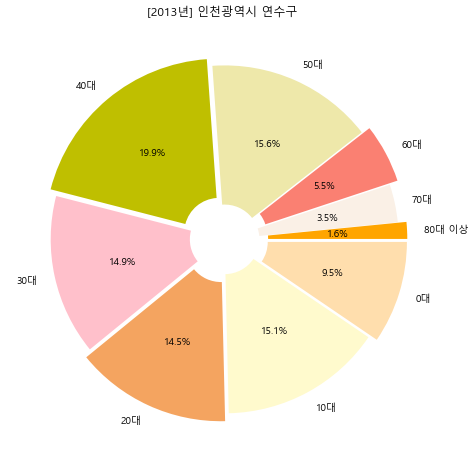

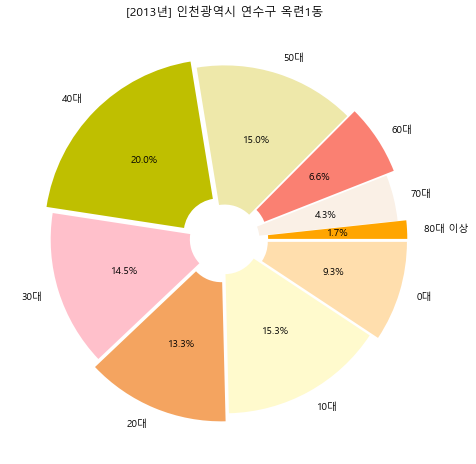

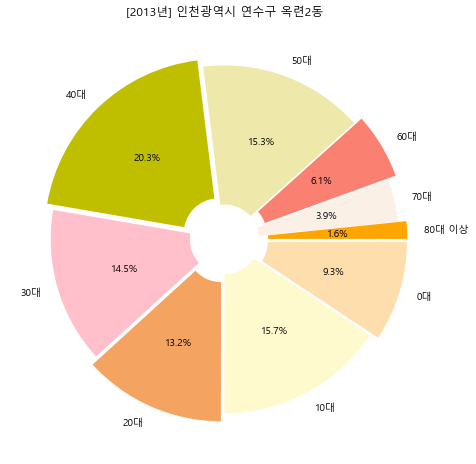

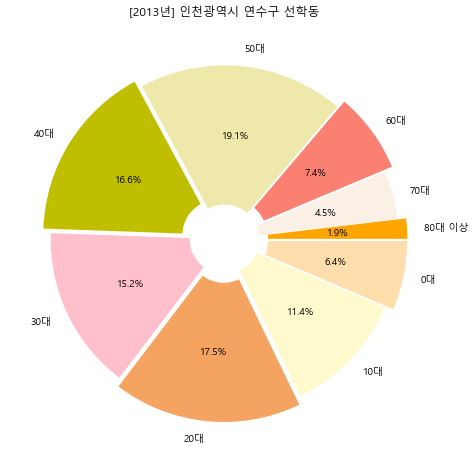

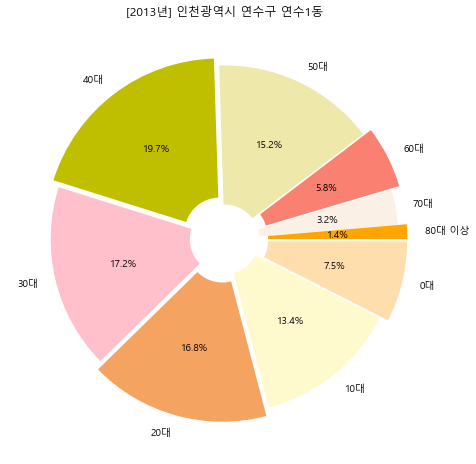

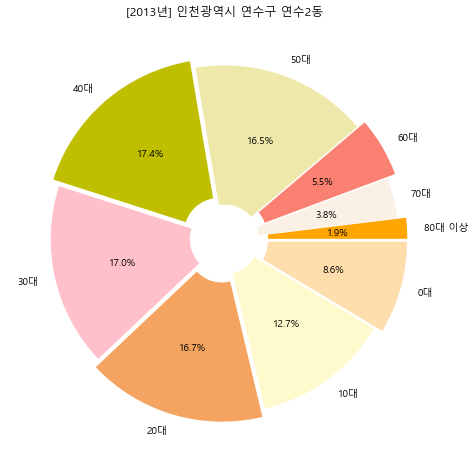

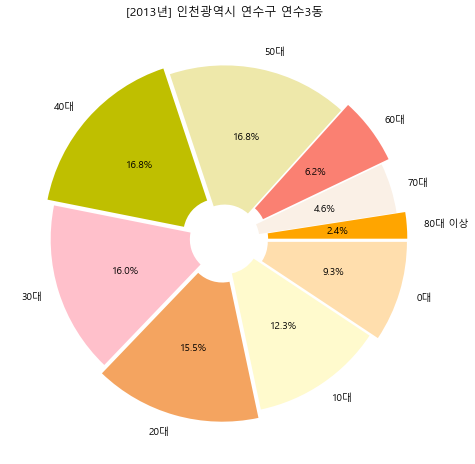

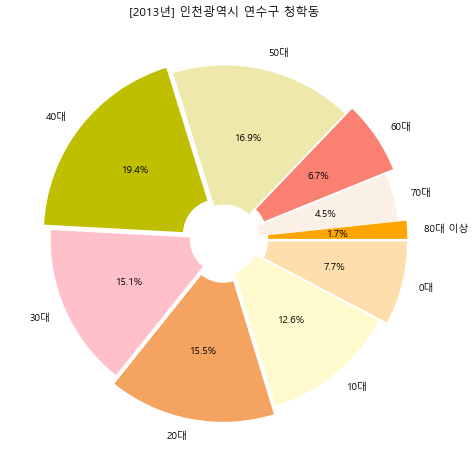

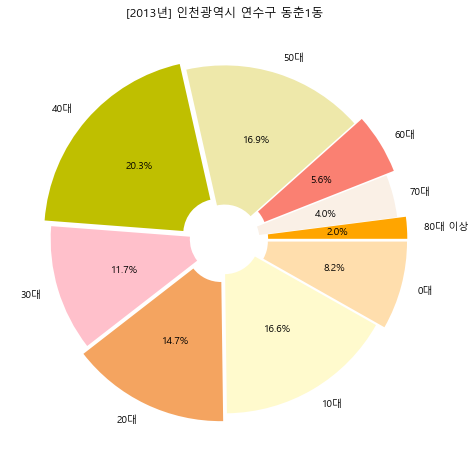

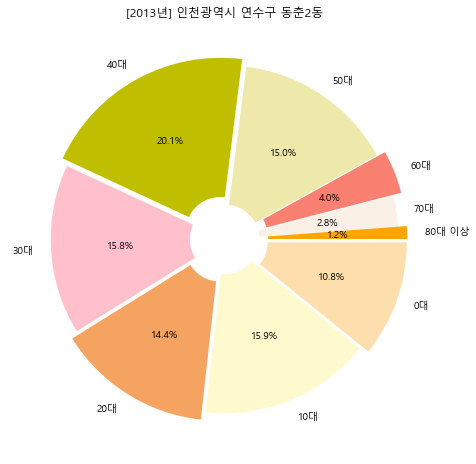

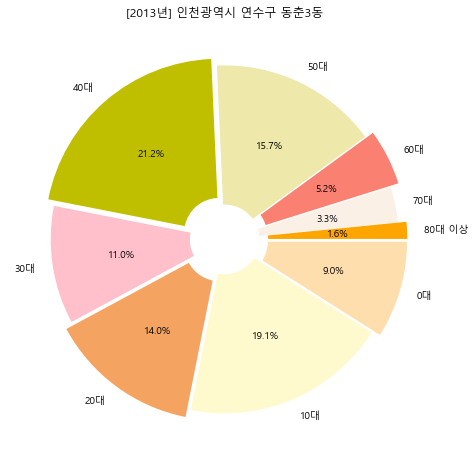

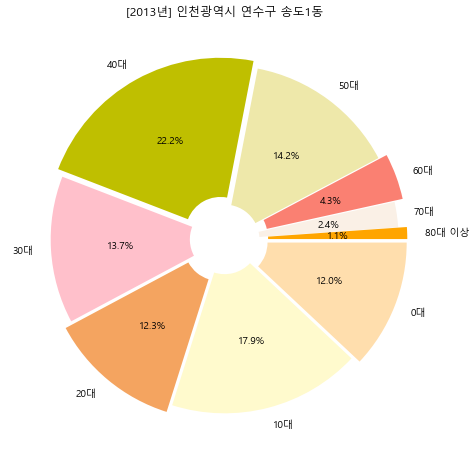

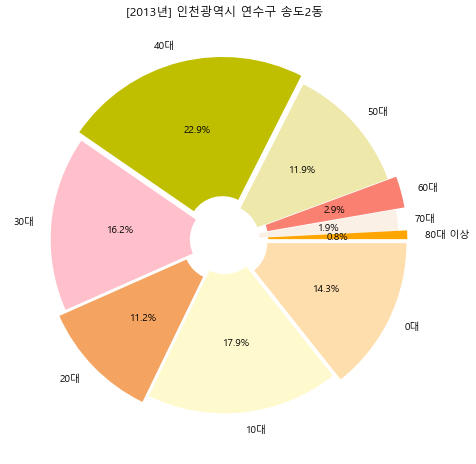

In [31]:
explode = [0.05, 0, 0.05, 0,0.05,0.0,0.05,0.0,0.05]
colors = ['navajowhite','lemonchiffon','sandybrown','pink','y','palegoldenrod','salmon','linen','orange']
for i in range(0,len(emdlist)): 
    try :
        tm1=df52013[df52013['emd_nm']==emdlist[i]]['total_pop']
        age=['0대','10대','20대','30대','40대','50대','60대','70대','80대 이상']
        per=[]
        for j in range(0,9):
            ages = j*10
            tm2=df52013[df52013['emd_nm']==emdlist[i]]['m_'+str(ages )+'g_pop']
            tm3=df52013[df52013['emd_nm']==emdlist[i]]['w_'+str(ages )+'g_pop']
            per.append(((tm2+tm3)/tm1).values[0])
        plt.rc('font', family='Malgun Gothic')
        plt.rc("axes",unicode_minus=False)
        fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
        fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
        ax = fig.add_subplot() ## 프레임 생성
        pie = ax.pie(per, ## 파이차트 출력
                     labels=age,
           startangle=0, ## 시작점을 90도(degree)로 지정
           counterclock=False, ## 시계 방향으로 그린다.
           autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
           wedgeprops=dict(width=0.8), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
           explode=explode,
           colors=colors)
        total = np.sum(per) ## 빈도수 합

        plt.title('[2013년] '+emdlist[i])
        plt.show()
    except :
        continue

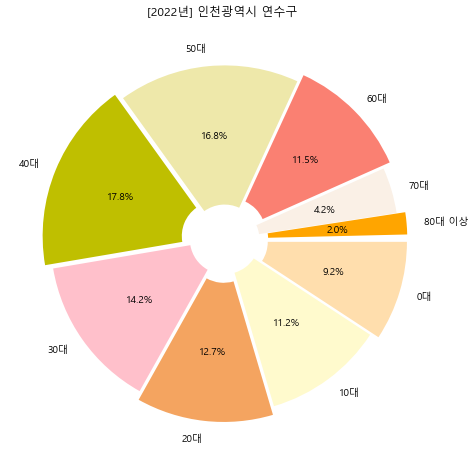

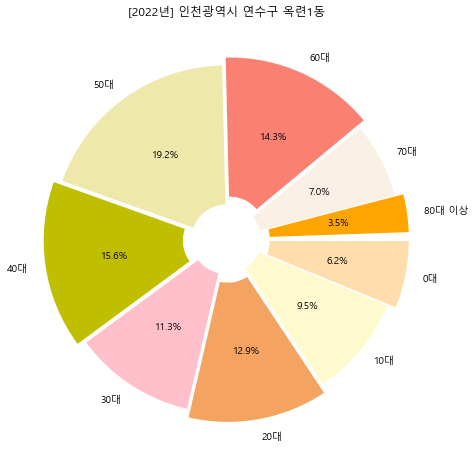

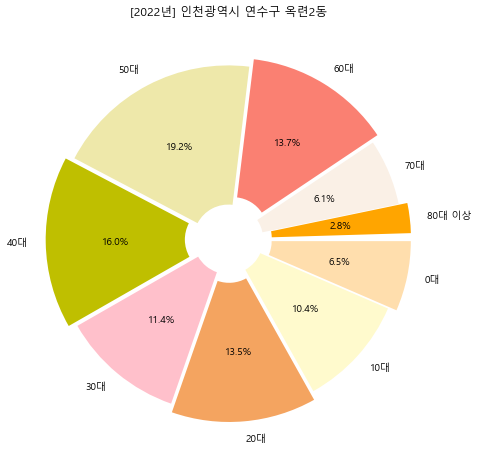

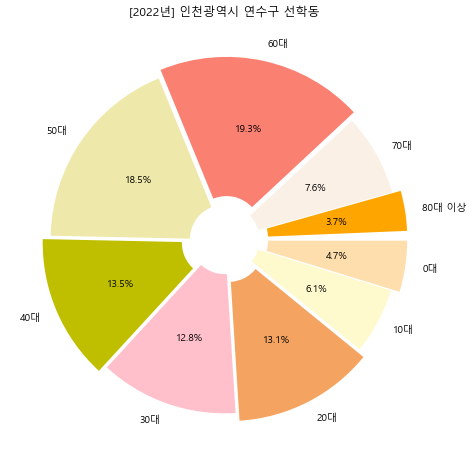

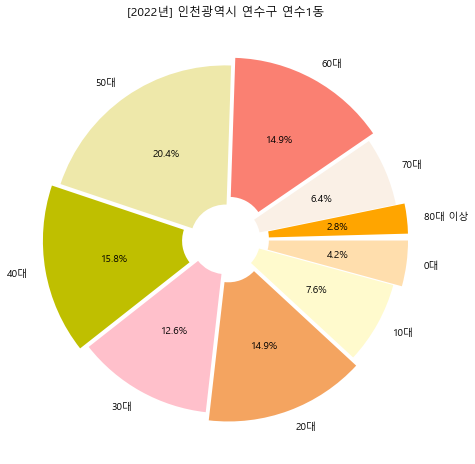

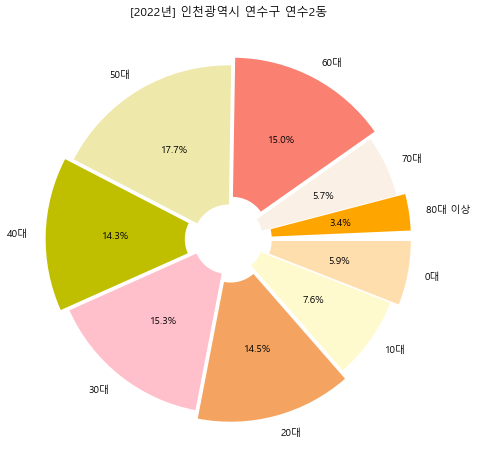

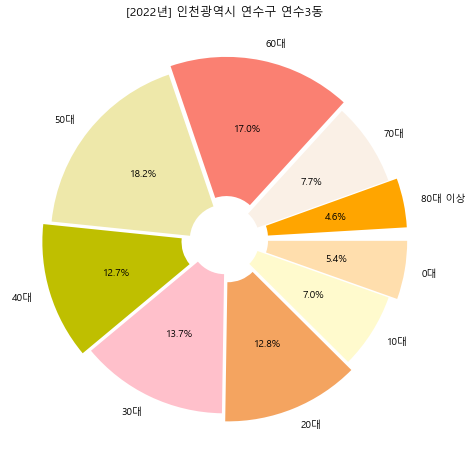

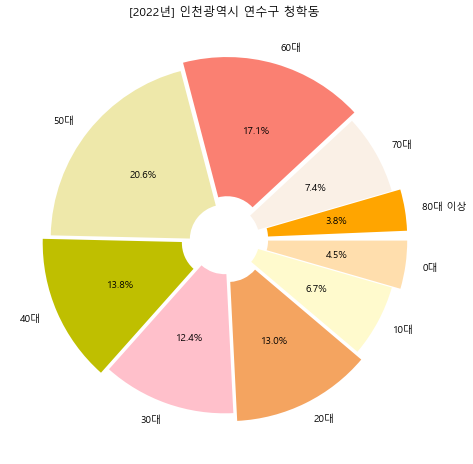

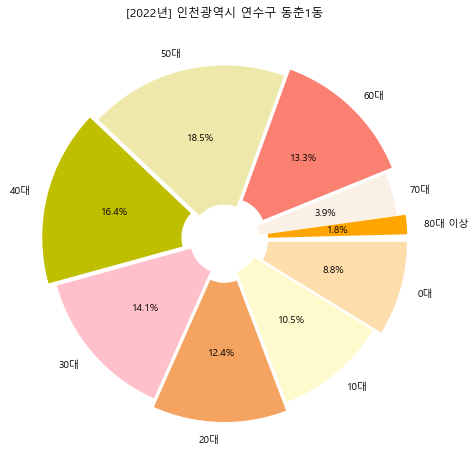

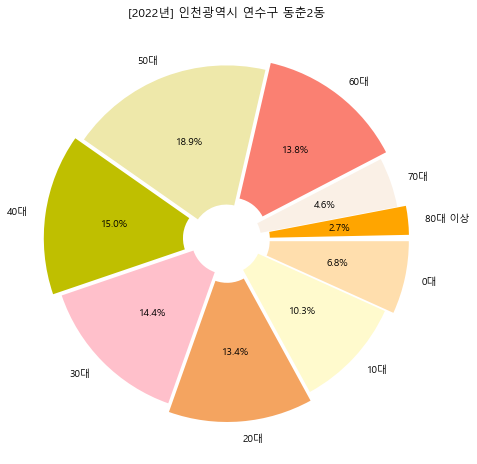

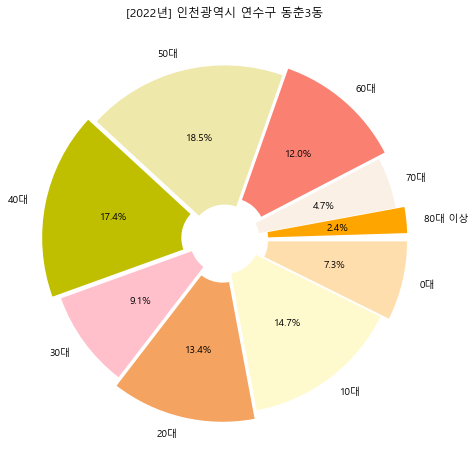

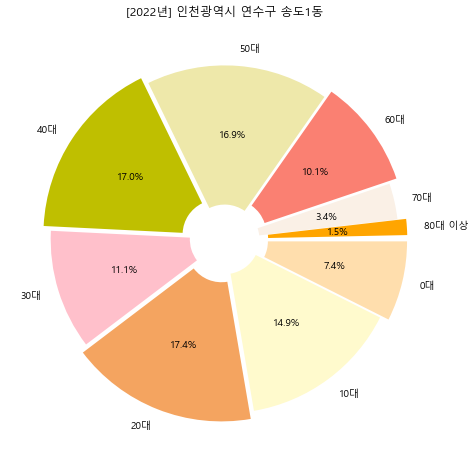

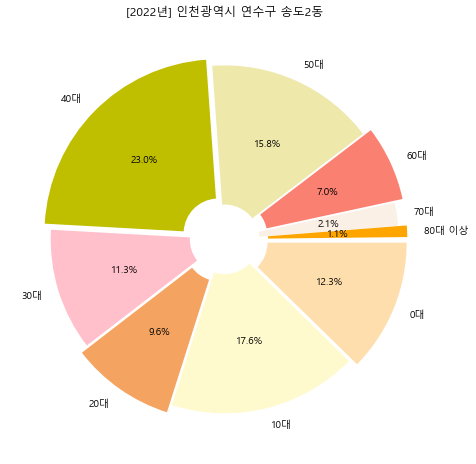

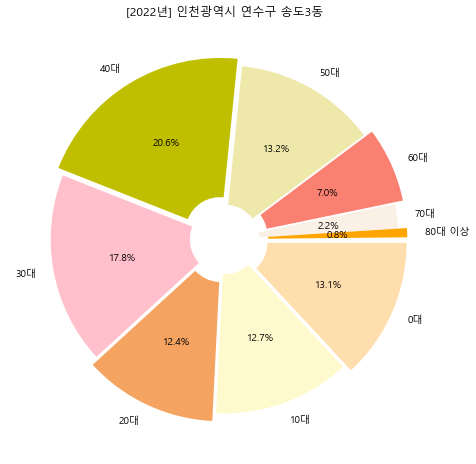

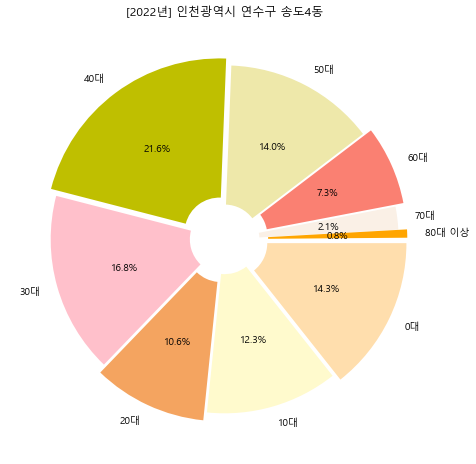

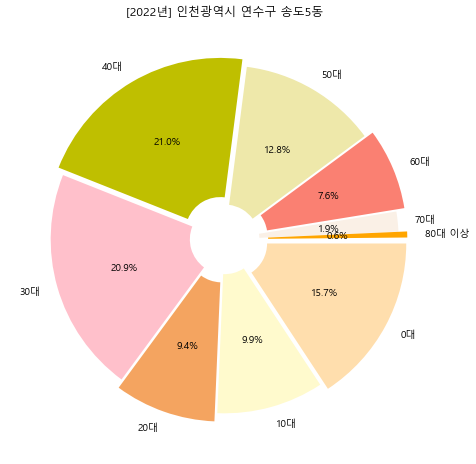

In [85]:
explode = [0.05, 0, 0.05, 0,0.05,0.0,0.05,0.0,0.05]
colors = ['navajowhite','lemonchiffon','sandybrown','pink','y','palegoldenrod','salmon','linen','orange']
for i in range(0,len(emdlist)): 
    try :
        tm1=df52022[df52022['emd_nm']==emdlist[i]]['total_pop']
        age=['0대','10대','20대','30대','40대','50대','60대','70대','80대 이상']
        per=[]
        for j in range(0,9):
            ages = j*10
            tm2=df52022[df52022['emd_nm']==emdlist[i]]['m_'+str(ages )+'g_pop']
            tm3=df52022[df52022['emd_nm']==emdlist[i]]['w_'+str(ages )+'g_pop']
            per.append(((tm2+tm3)/tm1).values[0])
        plt.rc('font', family='Malgun Gothic')
        plt.rc("axes",unicode_minus=False)
        fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
        fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
        ax = fig.add_subplot() ## 프레임 생성
        pie = ax.pie(per, ## 파이차트 출력
                     labels=age,
           startangle=0, ## 시작점을 90도(degree)로 지정
           counterclock=False, ## 시계 방향으로 그린다.
           autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
           wedgeprops=dict(width=0.8), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
           explode=explode,
           colors=colors)
        total = np.sum(per) ## 빈도수 합

        plt.title('[2022년] '+emdlist[i])
        plt.show()
    except :
        continue

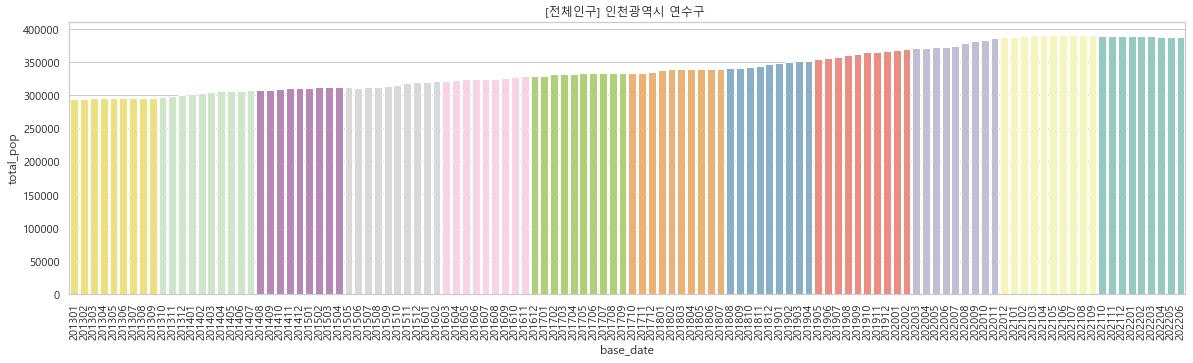

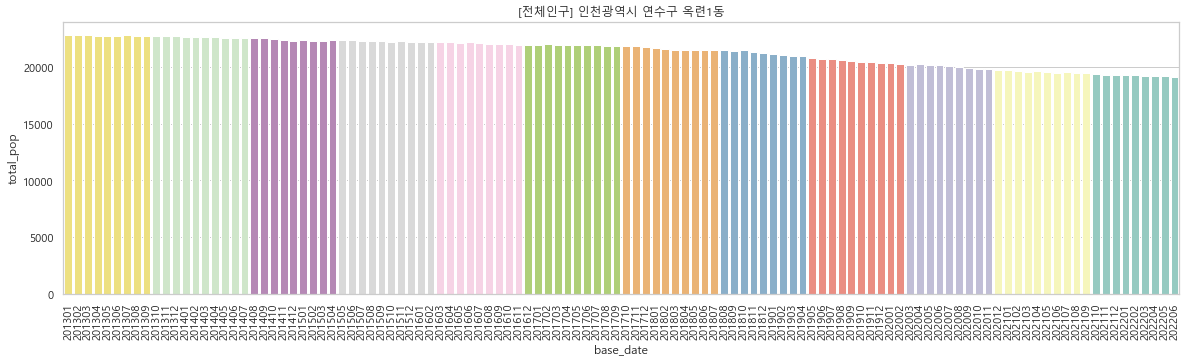

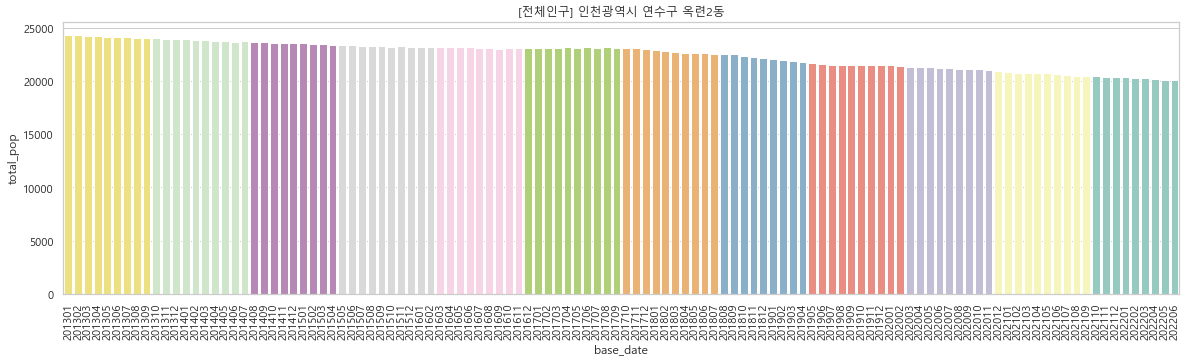

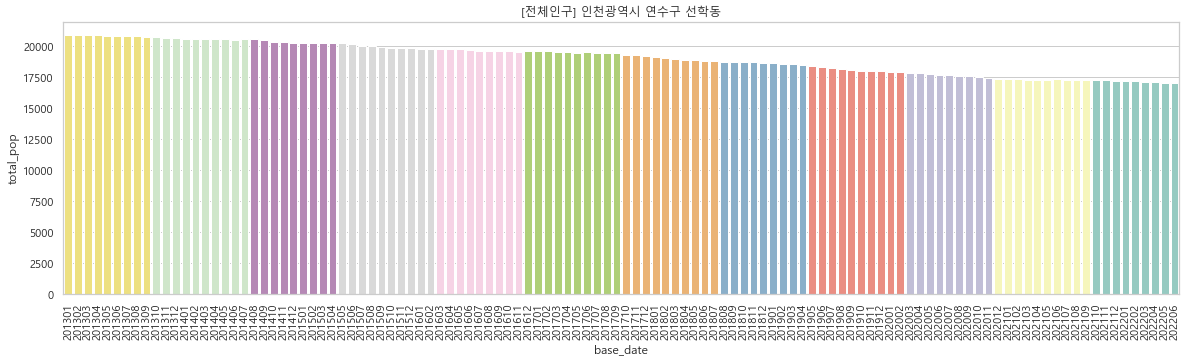

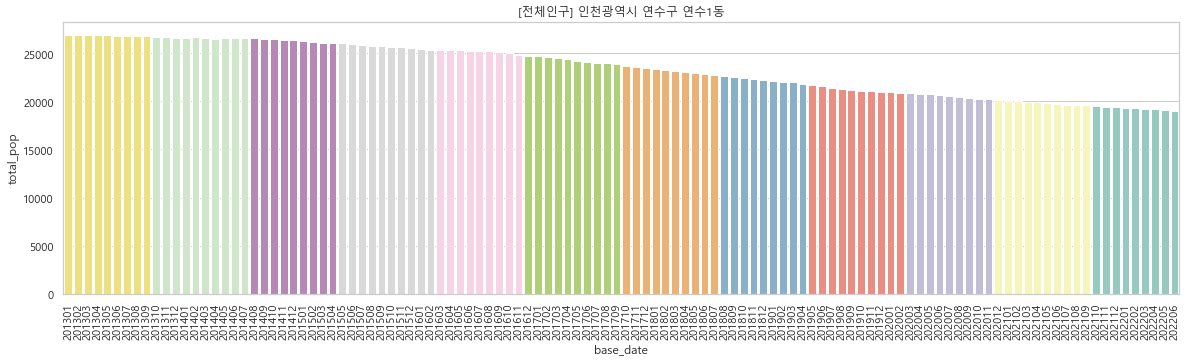

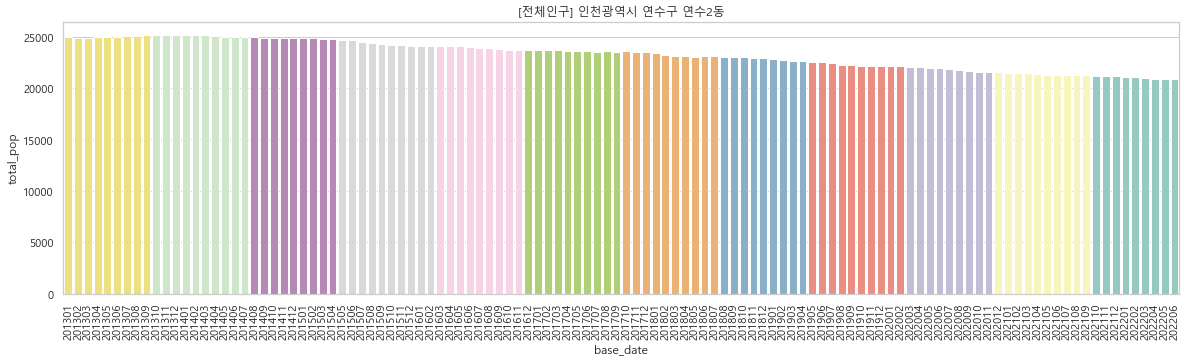

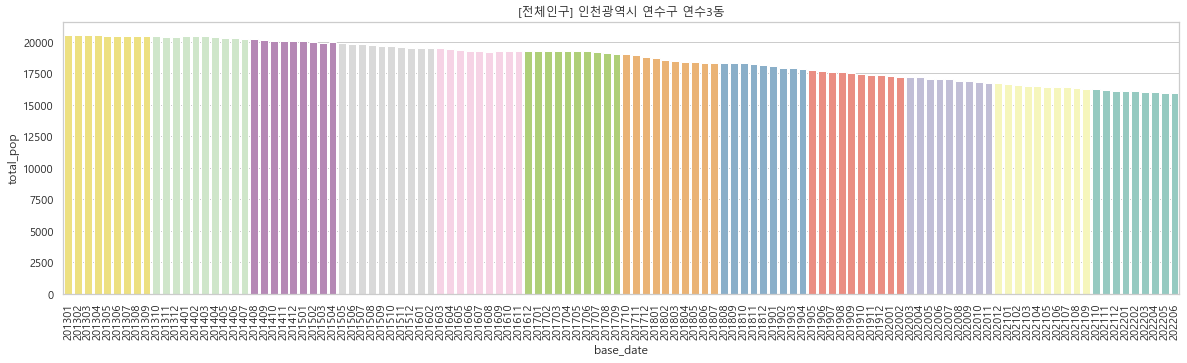

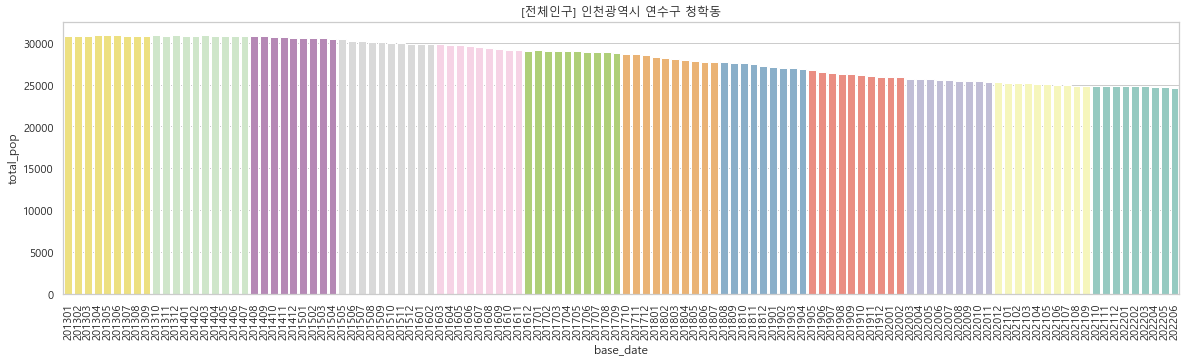

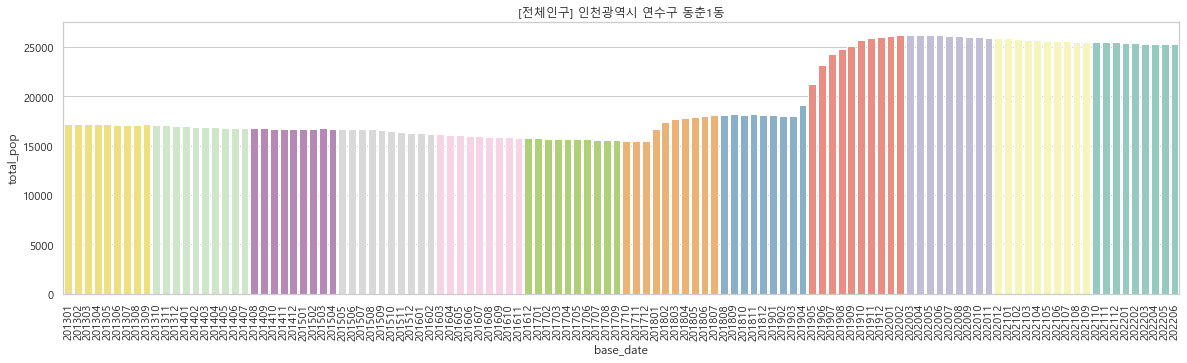

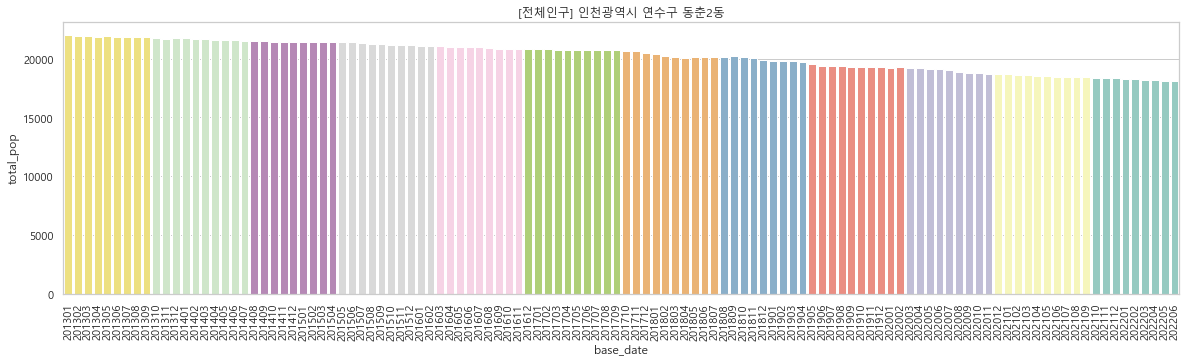

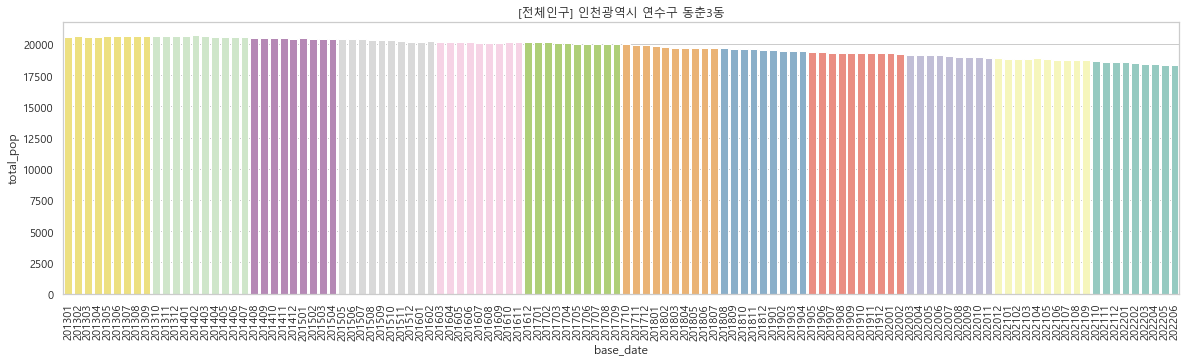

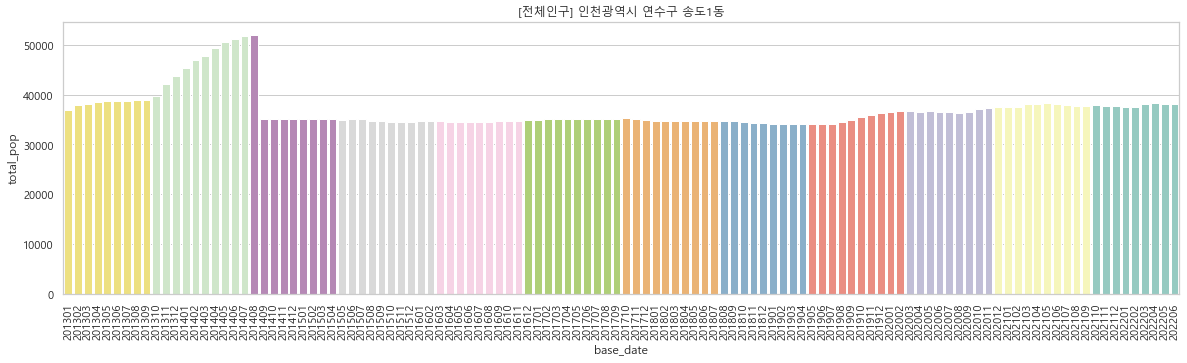

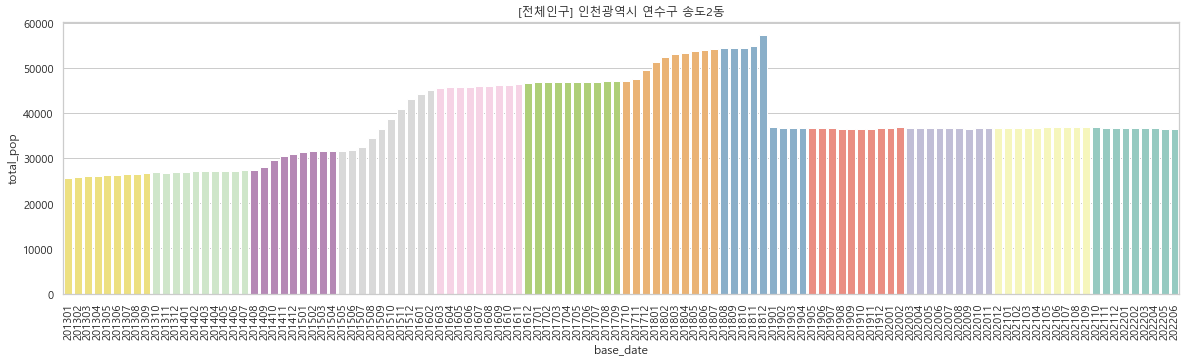

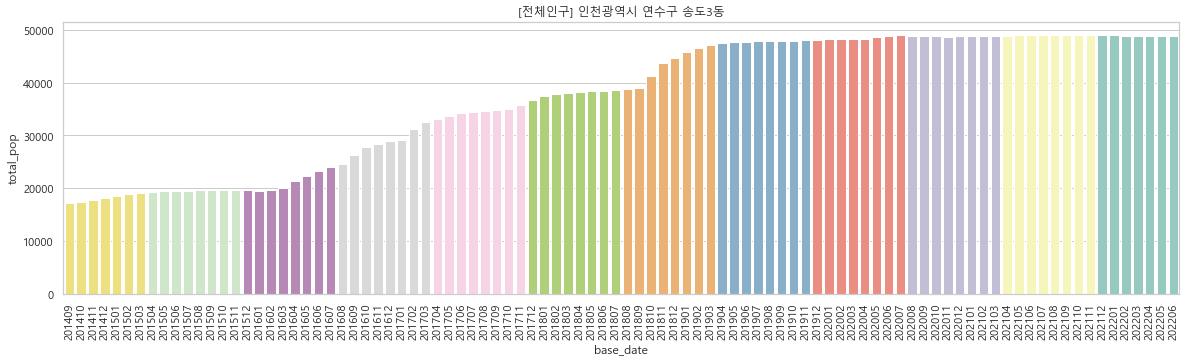

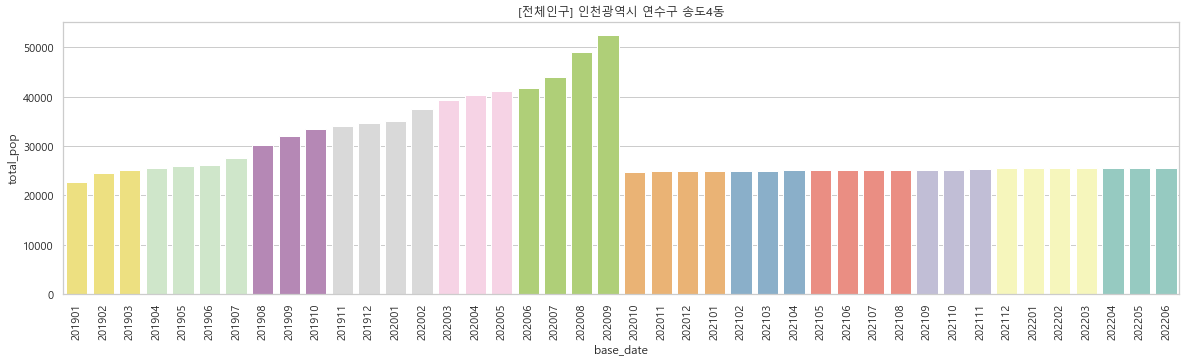

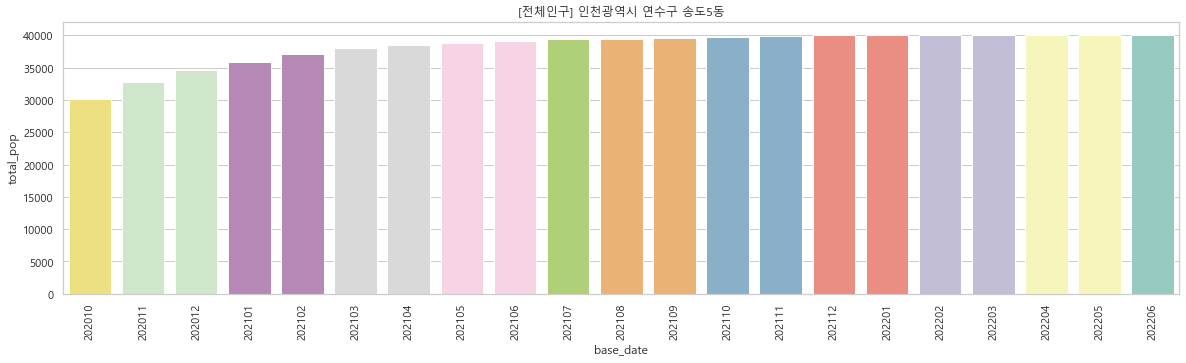

In [138]:
for i in range(0,len(emdlist)):
    plt.rc('font', family='Malgun Gothic')
    plt.rc("axes",unicode_minus=False)
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    sns.barplot(x='base_date', y='total_pop', data = df5[df5['emd_nm']==emdlist[i]].groupby(['base_date']).agg({'total_pop':'sum'}).reset_index(), palette='Set3_r')
    plt.xticks(rotation=90)
    plt.title('[전체인구] '+emdlist[i])
    plt.show()

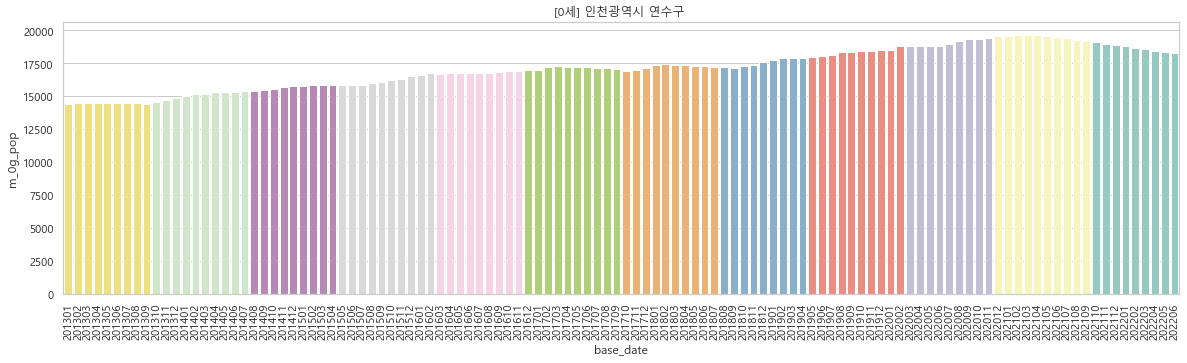

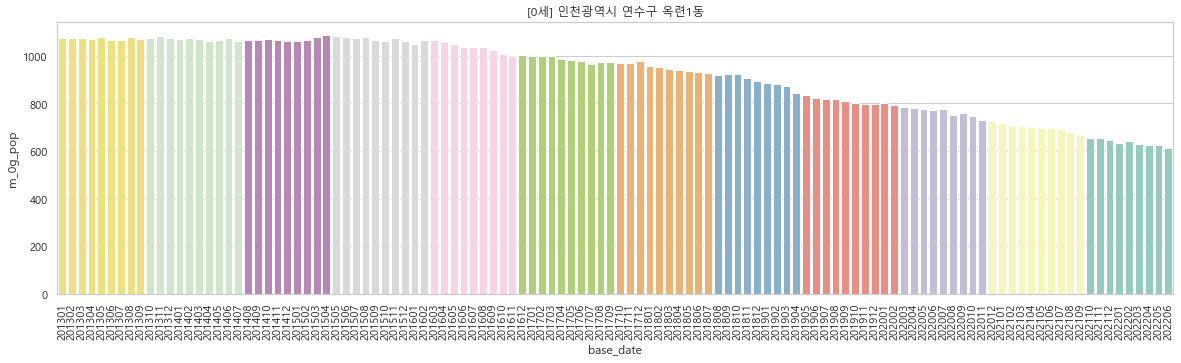

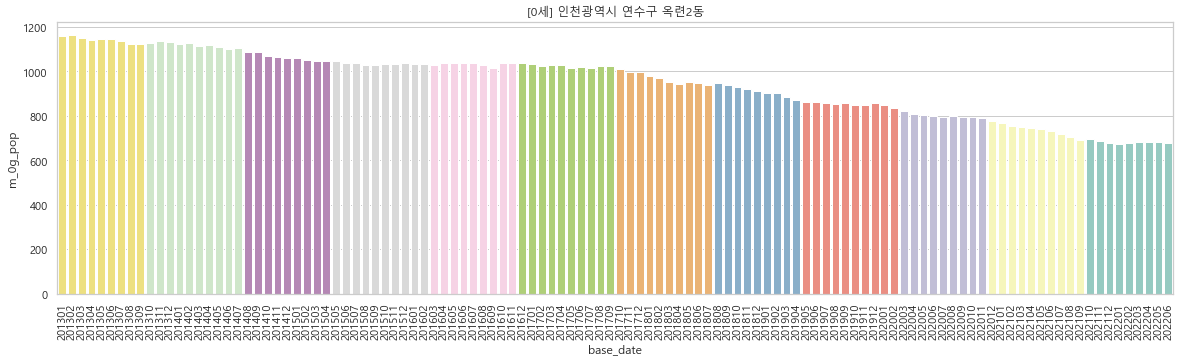

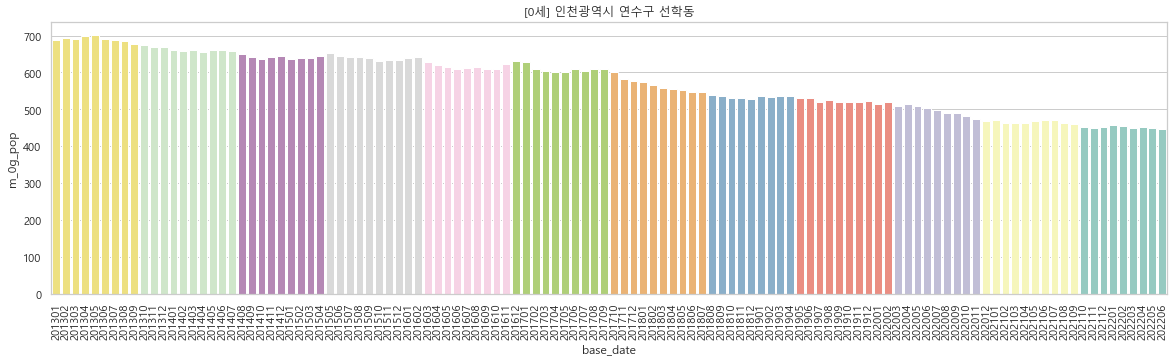

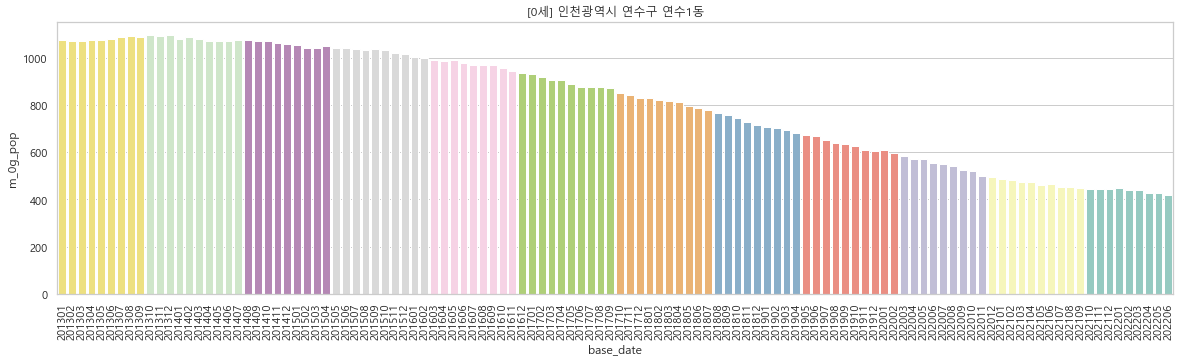

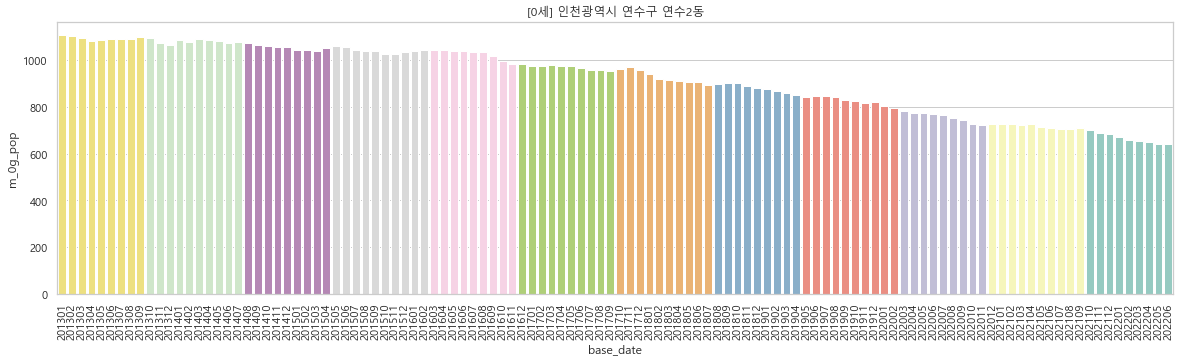

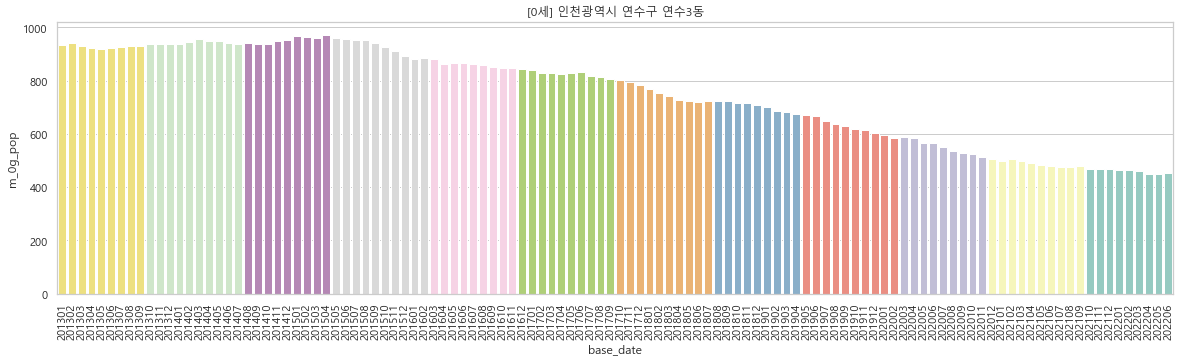

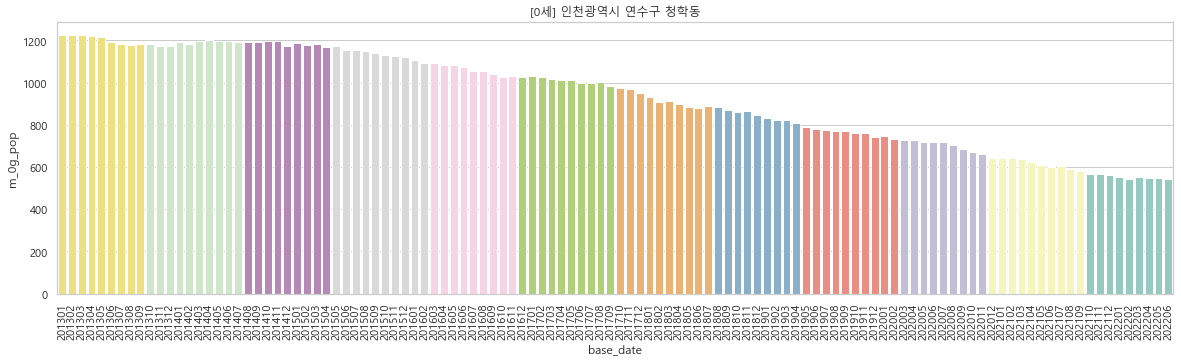

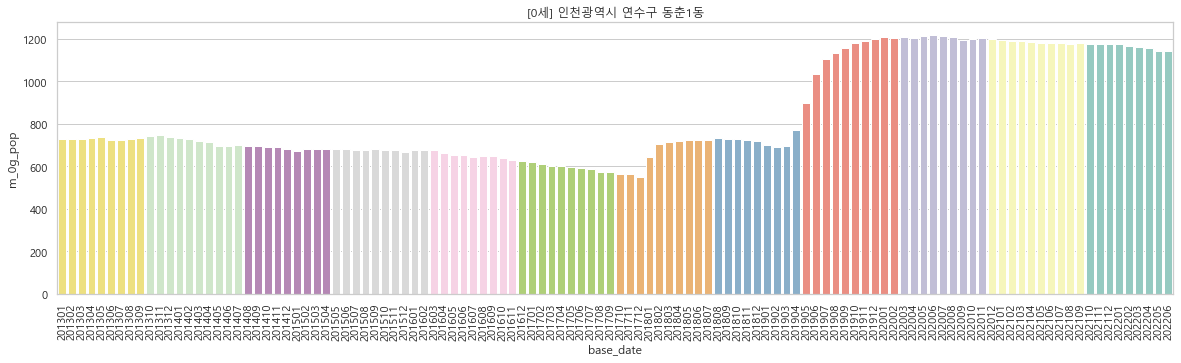

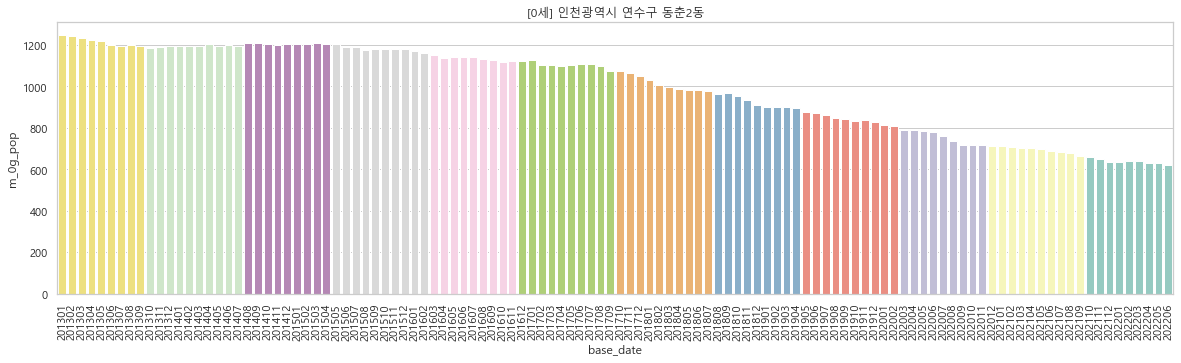

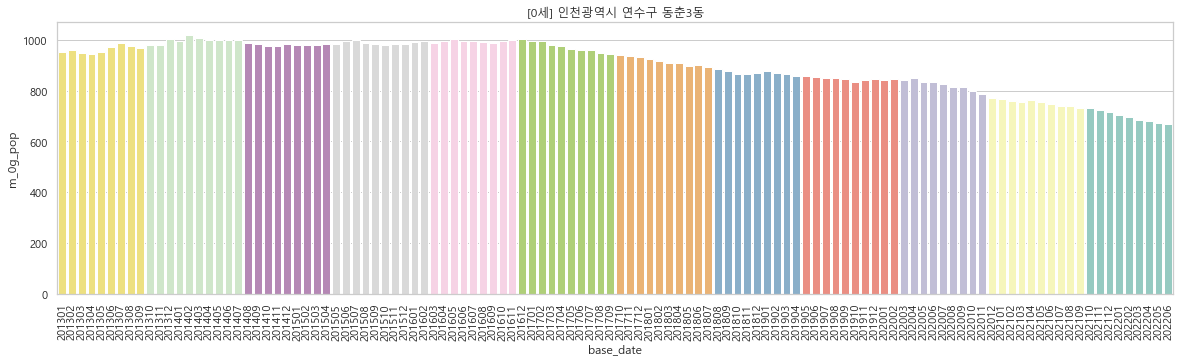

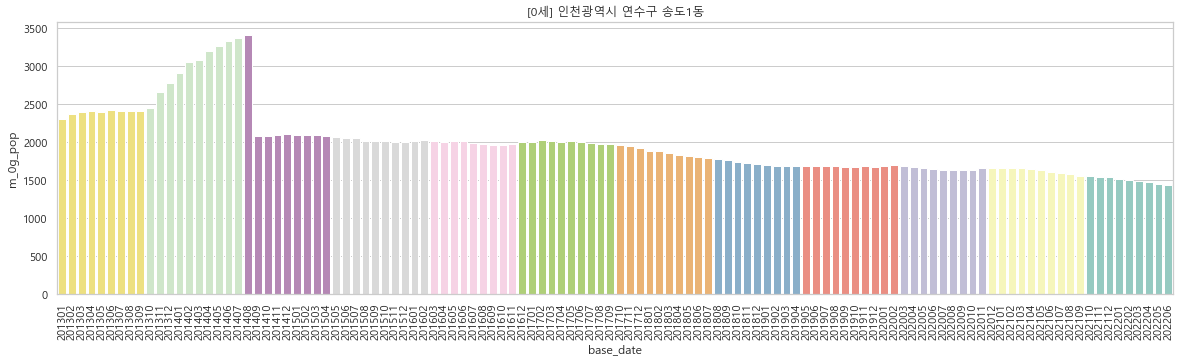

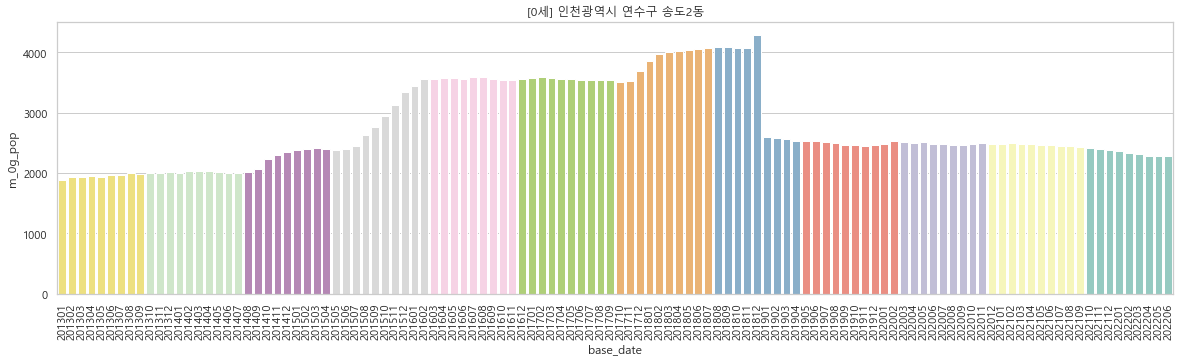

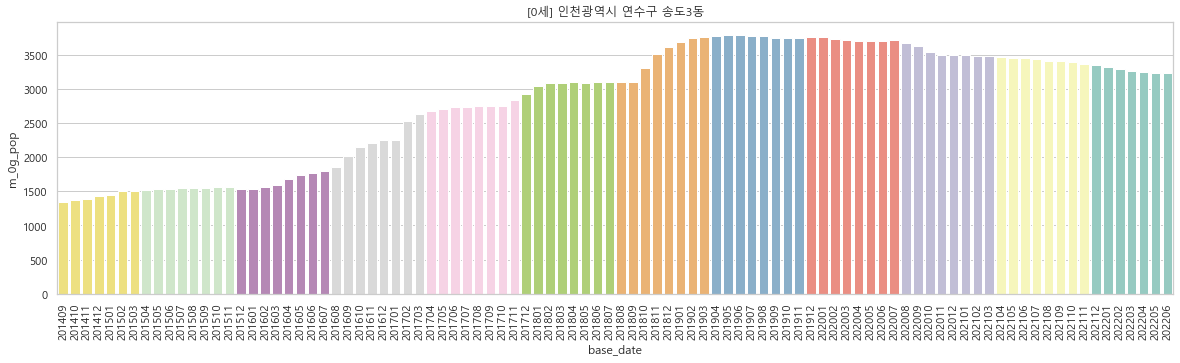

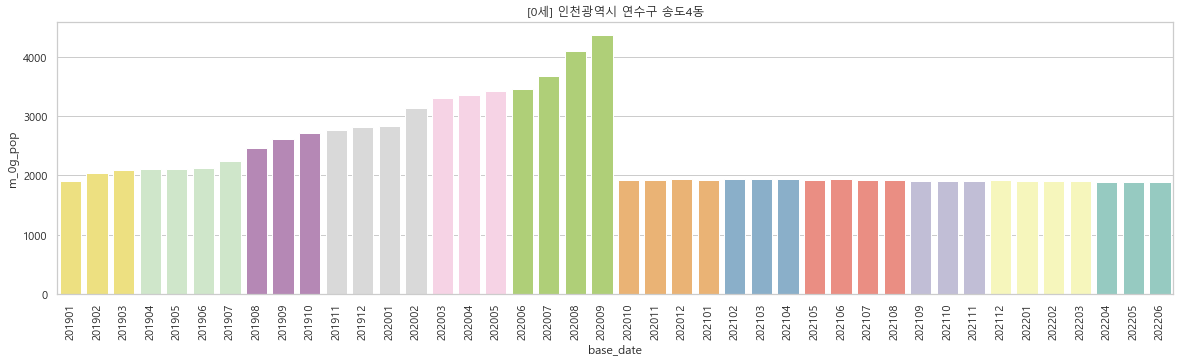

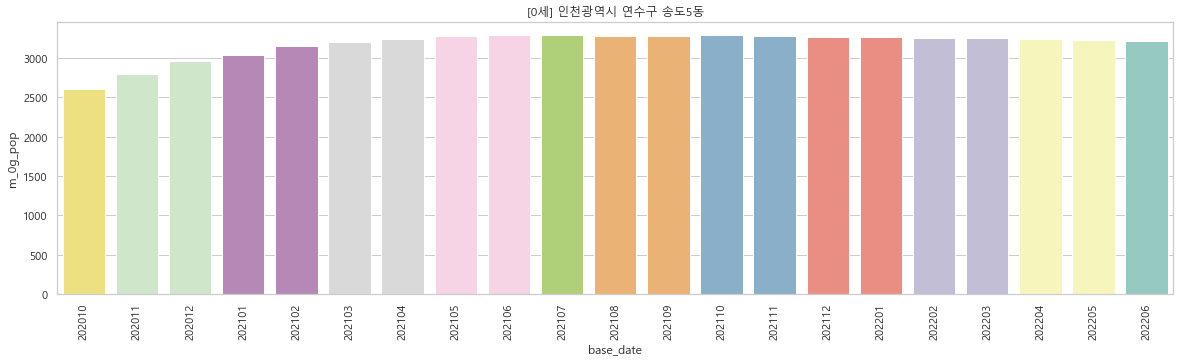

In [198]:
for i in range(0,len(emdlist)):
    plt.rc('font', family='Malgun Gothic')
    plt.rc("axes",unicode_minus=False)
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    sns.barplot(x='base_date', y='m_0g_pop', data = df5[df5['emd_nm']==emdlist[i]].groupby(['base_date']).agg({'m_0g_pop':'sum'}).reset_index(), palette='Set3_r')
    plt.xticks(rotation=90)
    plt.title('[0세] '+emdlist[i])
    plt.show()

In [34]:
df52013['emd_nm2']=df52013['emd_nm'].str.split(" ").str[2]
df52022['emd_nm2']=df52022['emd_nm'].str.split(" ").str[2]
tm1=df52013.groupby(['emd_nm2']).agg({'m_total_pop':'mean'}).reset_index().iloc[1:].rename(columns={'emd_nm2':'emd_nm','m_total_pop':'2013총인구'})
tm2=df52022.groupby(['emd_nm2']).agg({'m_total_pop':'mean'}).reset_index().iloc[1:].rename(columns={'emd_nm2':'emd_nm','m_total_pop':'2022총인구'})
tm3=pd.merge(tm1,tm2,left_on='emd_nm',right_on='emd_nm')
tm3['22-13 인구차']=tm3['2022총인구']-tm3['2013총인구']

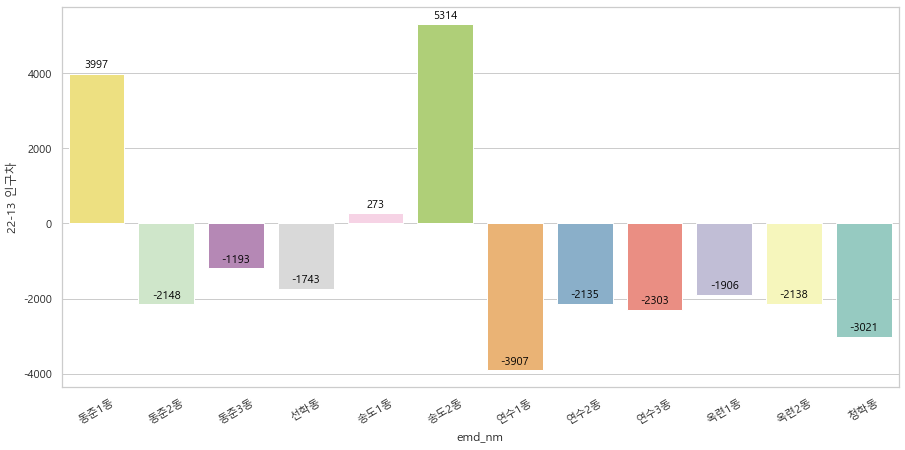

In [203]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(15,7))
plt.xticks(rotation=30)
ax=sns.barplot(x='emd_nm', y='22-13 인구차', data =tm3, palette='Set3_r')
for p in ax.patches:
    ax.annotate("%.0f"%p.get_height(),(p.get_x() + p.get_width()/2, p.get_height()-30),
               ha='center', va='center', fontsize=11, color='black', xytext=(0,10),
               textcoords='offset points')
plt.show()

# 6_연수구_세대원수별_세대수

In [29]:
df6=pd.read_excel('6_연수구_세대원수별_세대수.xlsx')
df6['6p_hshld']=df6['6p_hshld']+df6['7p_hshld']+df6['8p_hshld']+df6['9p_hshld']+df6['10p_hshld']

In [16]:
emdlist=df6['emd_nm'].unique()

In [17]:
df62016=df6[df6['base_date']==201607]
df62022=df6[df6['base_date']==202206]

In [18]:
df6['emd_nm_1']=df6['emd_nm'].str.split(" ").str[-1]

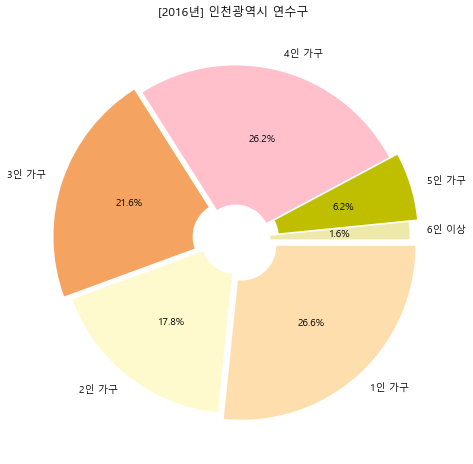

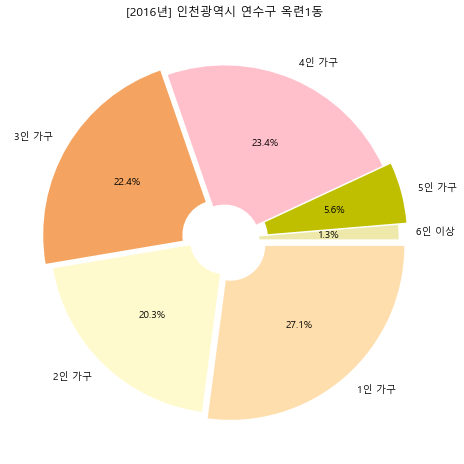

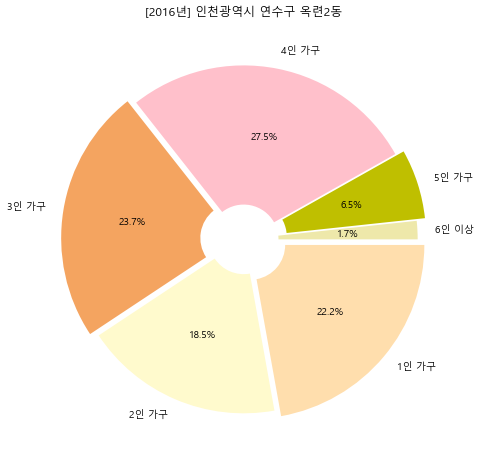

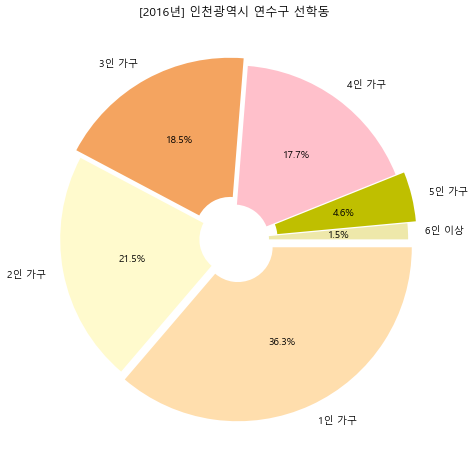

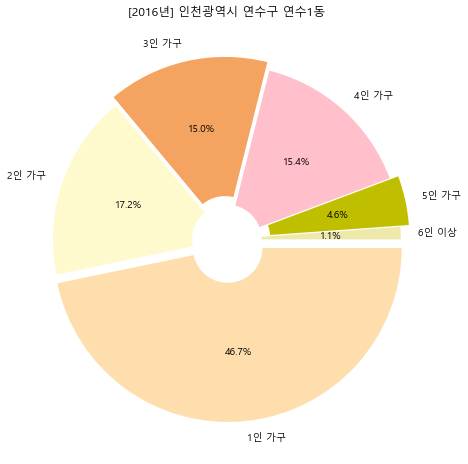

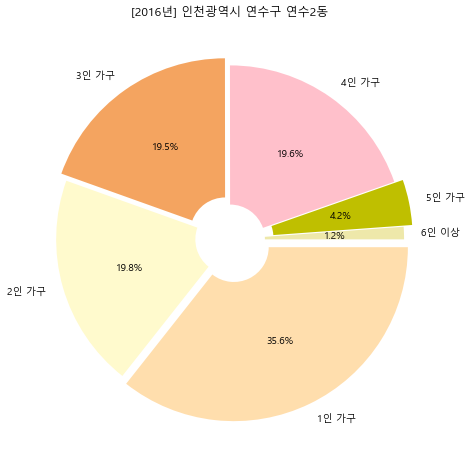

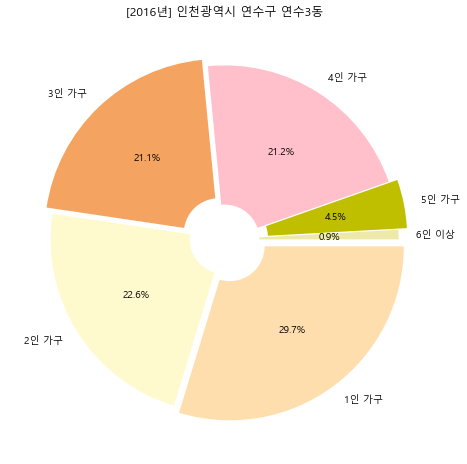

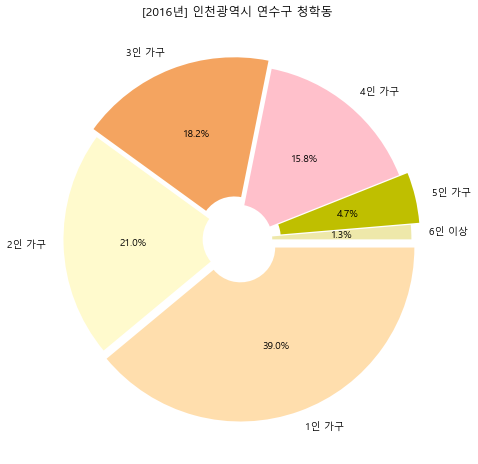

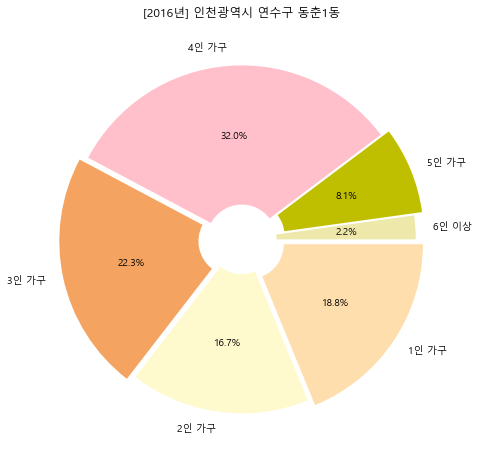

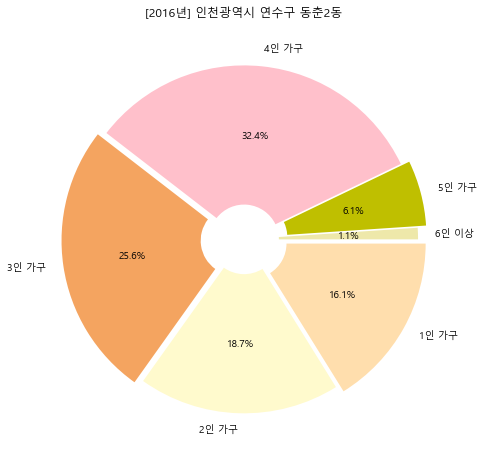

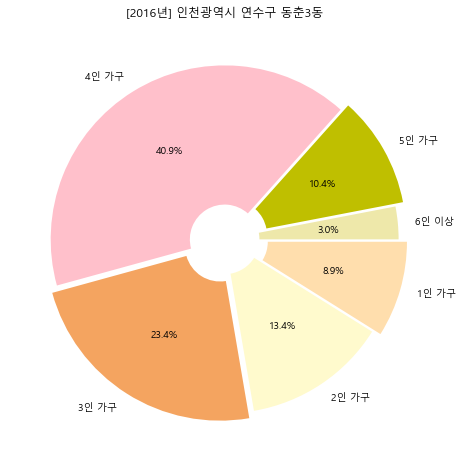

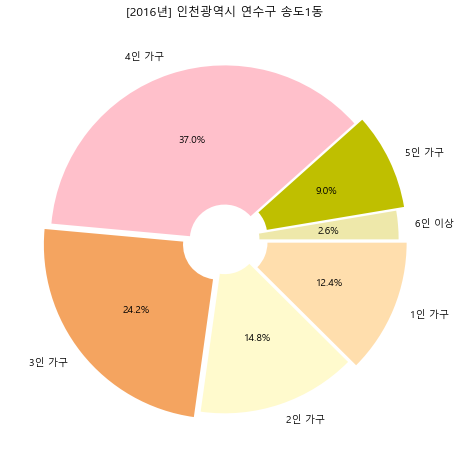

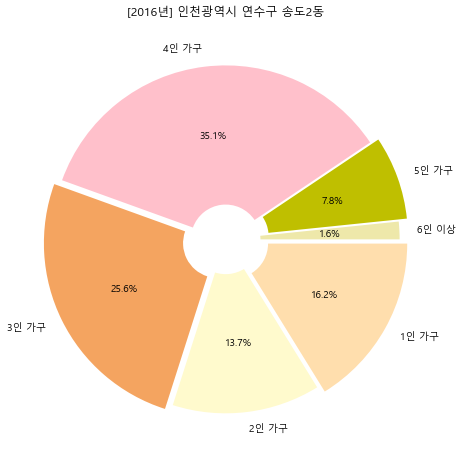

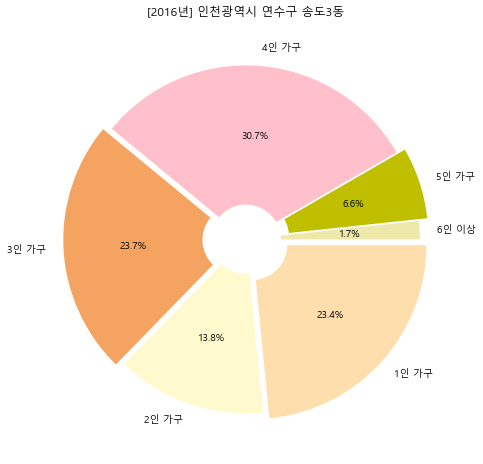

In [22]:
explode = [0.05, 0, 0.05, 0,0.05,0.0]
colors = ['navajowhite','lemonchiffon','sandybrown','pink','y','palegoldenrod','salmon','linen','orange','red']
for i in range(0,len(emdlist)): 
    try :
        tm1=df62016[df62016['emd_nm']==emdlist[i]]['total_hshld']
        age=['1인 가구','2인 가구','3인 가구','4인 가구','5인 가구','6인 이상']
        per=[]
        for j in range(1,7):
            tm2=df62016[df62016['emd_nm']==emdlist[i]][str(j )+'p_hshld']
            tm3=df62016[df62016['emd_nm']==emdlist[i]][str(j )+'p_hshld']
            per.append(((tm2+tm3)/tm1).values[0])
        plt.rc('font', family='Malgun Gothic')
        plt.rc("axes",unicode_minus=False)
        fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
        fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
        ax = fig.add_subplot() ## 프레임 생성
        pie = ax.pie(per, ## 파이차트 출력
                     labels=age,
           startangle=0, ## 시작점을 90도(degree)로 지정
           counterclock=False, ## 시계 방향으로 그린다.
           autopct=lambda p : '{:.1f}%'.format(p), ## 퍼센티지 출력
           wedgeprops=dict(width=0.8), ## 중간의 반지름 0.5만큼 구멍을 뚫어준다.
           explode=explode,
           colors=colors)
        total = np.sum(per) ## 빈도수 합

        plt.title('[2016년] '+emdlist[i])
        plt.show()
    except :
        continue

# 11_연수구_상권정보

In [22]:
df11=pd.read_csv('11_연수구_상권정보.csv')
df11_비정상영업=df11[(df11['open_type']!="영업중")&(df11['open_type']!="정상")&(df11['open_type']!="영업")&(df11['open_type']!="정상영업")&(df11['open_type']!="영업재개")]
df11_정상영업=df11[(df11['open_type']=="영업중")|(df11['open_type']=="정상")|(df11['open_type']=="영업")|(df11['open_type']=="정상영업")|(df11['open_type']=="영업재개")]

In [32]:
center = [37.501276 ,126.640671]   
m=folium.Map(location=center, zoom_start=10) 

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

locdf11_비정상영업 = df11_비정상영업[['lat','lon']].values[:len(df11_비정상영업)].tolist()
for i in range(len(df11_비정상영업)):  
    folium.Marker(
    location=locdf11_비정상영업[i],
    popup='.',
    icon=folium.Icon(color='red',icon='ok'),
    ).add_to(marker_cluster)
m.save('비정상영업.html')

center = [37.501276 ,126.640671]   
m=folium.Map(location=center, zoom_start=10) 

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

locdf11_정상영업 = df11_정상영업[['lat','lon']].values[:len(df11_정상영업)].tolist()
for i in range(len(locdf11_정상영업)):  
    folium.Marker(
    location=locdf11_정상영업[i],
    popup='.',
    icon=folium.Icon(color='red',icon='ok'),
    ).add_to(marker_cluster)
m.save('정상영업.html')

# 12_연수구_학교현황

In [23]:
df12=pd.read_excel('12_연수구_학교현황.xlsx')

In [ ]:
center = [37.501276 ,126.640671]   
m=folium.Map(location=center, zoom_start=10) 

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

df12tolist = df12[['lat','lon']].values[:len(df12)].tolist()
for i in range(len(df12tolist)):  
    folium.Marker(
    location=df12tolist[i],
    popup='.',
    icon=folium.Icon(color='blue',icon='ok'),
    ).add_to(marker_cluster)
m.save('학교위치.html')

In [ ]:
df12유치원초등학교=df12[(df12['fac_nm'].str.contains("초등학교"))|(df12['fac_nm'].str.contains("유치원"))]

center = [37.501276 ,126.640671]   
m=folium.Map(location=center, zoom_start=10) 

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m)

df12tolist = df12유치원초등학교[['lat','lon']].values[:len(df12유치원초등학교)].tolist()
for i in range(len(df12tolist)):  
    folium.Marker(
    location=df12tolist[i],
    popup='.',
    icon=folium.Icon(color='blue',icon='ok'),
    ).add_to(marker_cluster)    
    
m.save('유치원초등학교위치.html')

# 15_연수구_아파트_매매_실거래가

In [30]:
df15=pd.read_excel('15_연수구_아파트_매매_실거래가.xlsx')
df15['bjd_nm_d']=df15['bjd_nm'].str.split(" ").str[2]
df15['per_price']=df15['trade_price']/df15['exclusive_area']
df15.head(3)

,bjd_nm,road_nm,bunji,cmplx_nm,exclusive_area,cntrc_ym,cntrc_day,trade_price,floor,cnstr_year,bjd_nm_d,per_price
0,인천광역시 연수구 동춘동,먼우금로83번길 12,938,건영,84.945,202201,25,47000,1,1994.0,동춘동,553.299194
1,인천광역시 연수구 동춘동,먼우금로83번길 12,938,건영,84.945,202202,9,38000,1,1994.0,동춘동,447.348284
2,인천광역시 연수구 동춘동,먼우금로83번길 12,938,건영,84.945,202204,30,42200,5,1994.0,동춘동,496.792042


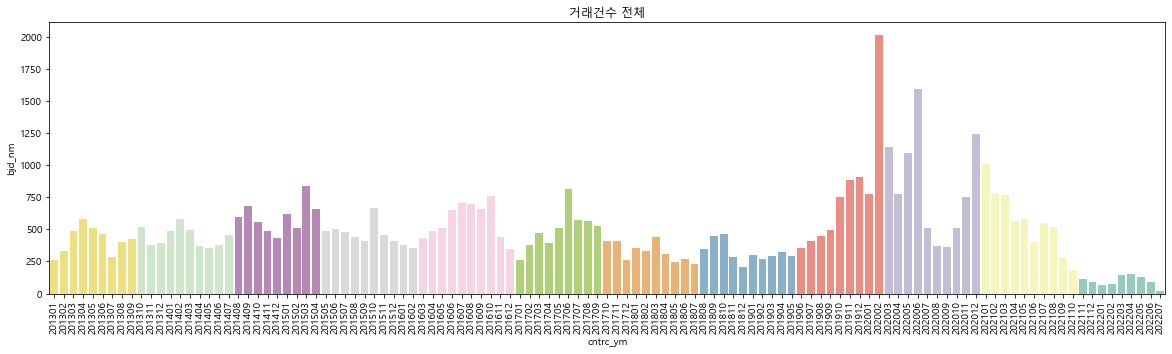

In [33]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=30)
sns.barplot(x='cntrc_ym', y='bjd_nm', data = df15.groupby(['cntrc_ym']).agg({'bjd_nm':'count'}).reset_index(), palette='Set3_r')
plt.xticks(rotation=90)
plt.title("거래건수 전체")
plt.show()

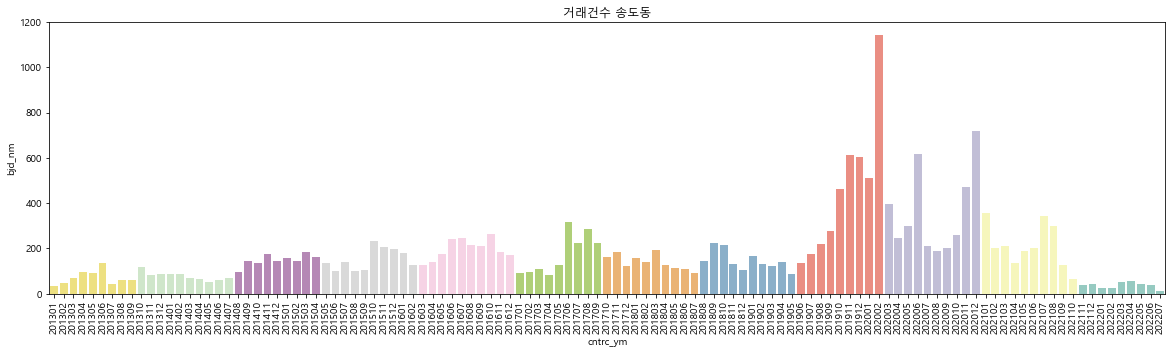

In [34]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=30)
sns.barplot(x='cntrc_ym', y='bjd_nm', data = df15[df15['bjd_nm_d']=='송도동'].groupby(['cntrc_ym']).agg({'bjd_nm':'count'}).reset_index(), palette='Set3_r')
plt.xticks(rotation=90)
plt.title("거래건수 송도동")
plt.show()

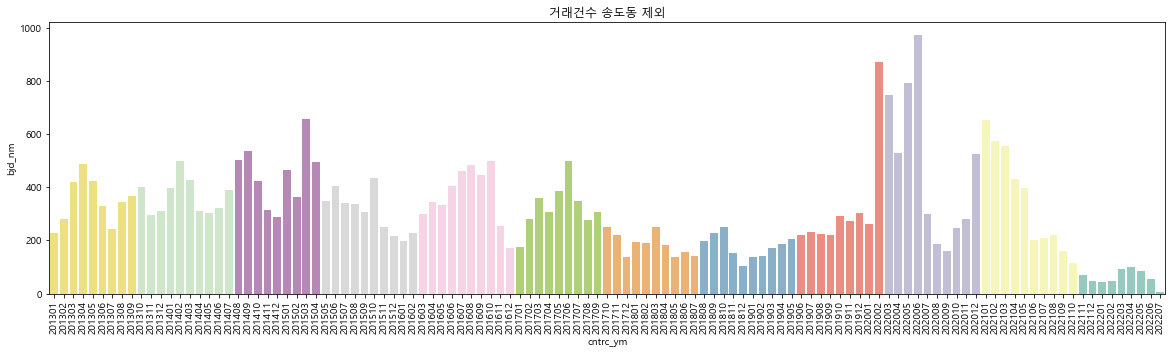

In [36]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=30)
sns.barplot(x='cntrc_ym', y='bjd_nm', data = df15[df15['bjd_nm_d']!='송도동'].groupby(['cntrc_ym']).agg({'bjd_nm':'count'}).reset_index(), palette='Set3_r')
plt.xticks(rotation=90)
plt.title("거래건수 송도동 제외")
plt.show()

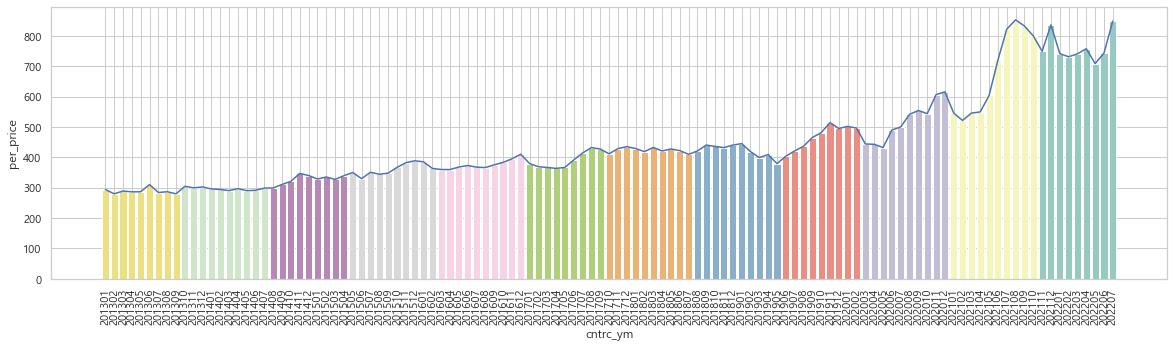

In [136]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=30)
sns.barplot(x='cntrc_ym', y='per_price', data = df15.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
df15.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index()['per_price'].plot()
plt.xticks(rotation=90)
plt.show()

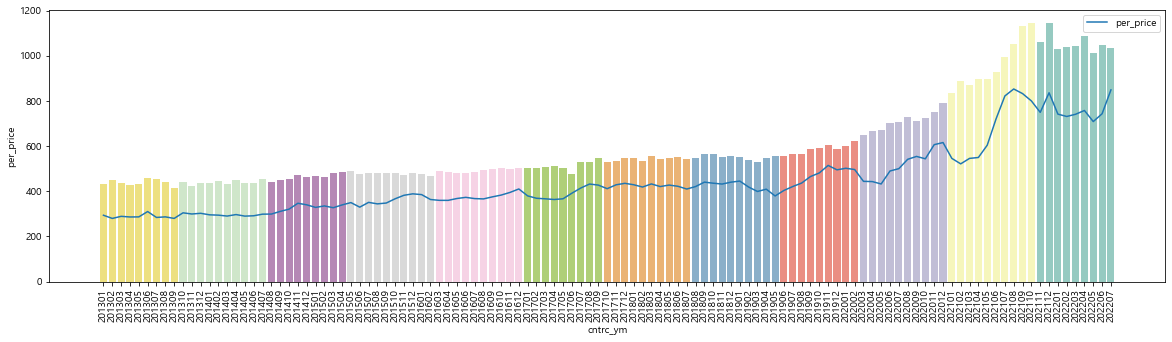

In [13]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='cntrc_ym', y='per_price', data = df15[df15['bjd_nm_d']=='송도동'].groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
df15.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index()['per_price'].plot(legend='전체')
plt.xticks(rotation=90)
plt.show()

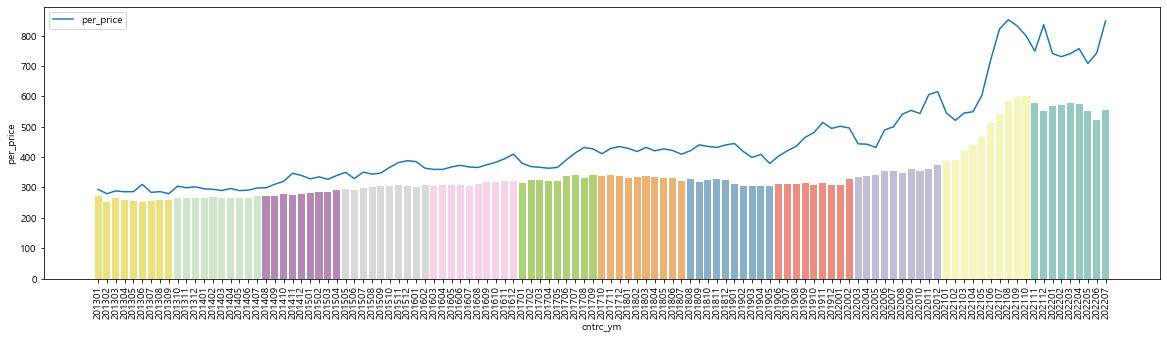

In [14]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='cntrc_ym', y='per_price', data = df15[df15['bjd_nm_d']!='송도동'].groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
df15.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index()['per_price'].plot(legend='전체')
plt.xticks(rotation=90)
plt.show()

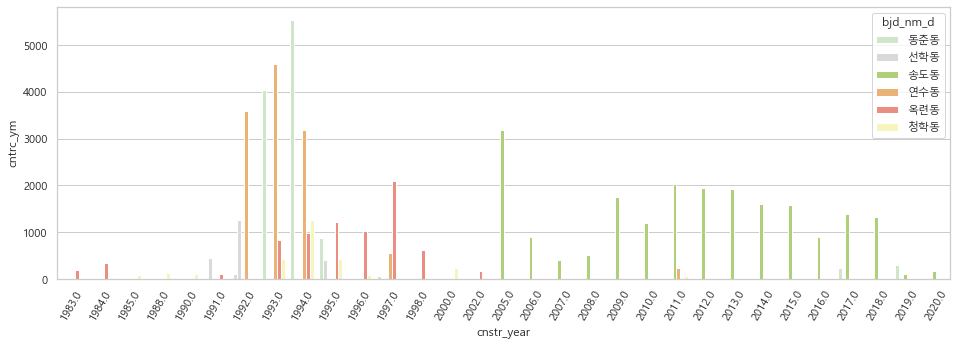

In [133]:
tmp=df15.groupby(['bjd_nm_d','cnstr_year']).agg({'cntrc_ym':'count'}).reset_index()
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(16,5))
plt.xticks(rotation=60)
sns.barplot(x='cnstr_year', y='cntrc_ym', hue='bjd_nm_d', data = tmp, palette='Set3_r')
plt.show()

# 18_연수구_오피스텔_매매_실거래가

In [37]:
df18=pd.read_excel('18_연수구_오피스텔_매매_실거래가.xlsx')
df18['bjd_nm_d']=df18['bjd_nm'].str.split(" ").str[2]
df18['per_price']=df18['trade_price']/df18['exclusive_area']

In [28]:
df18['bjd_nm_d'].unique()

array(['송도동', '연수동', '청학동', '선학동', '옥련동'], dtype=object)

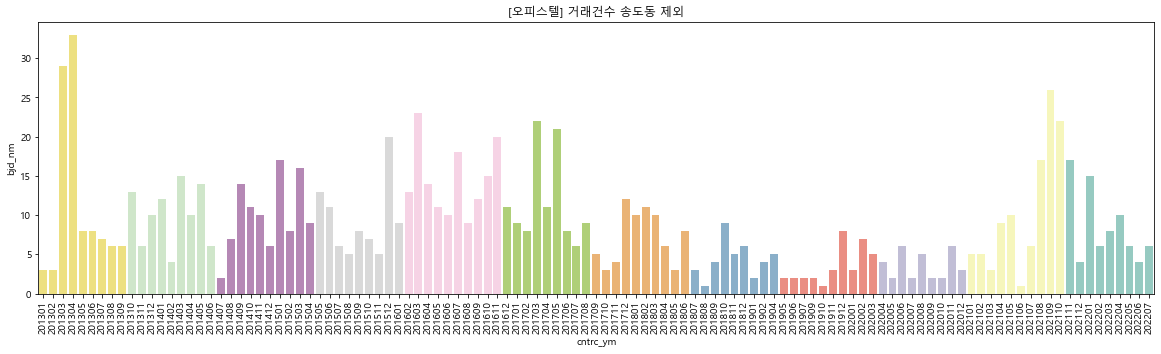

In [41]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=30)
sns.barplot(x='cntrc_ym', y='bjd_nm', data = df18[df18['bjd_nm_d']!='송도동'].groupby(['cntrc_ym']).agg({'bjd_nm':'count'}).reset_index(), palette='Set3_r')
plt.xticks(rotation=90)
plt.title("[오피스텔] 거래건수 송도동 제외")
plt.show()

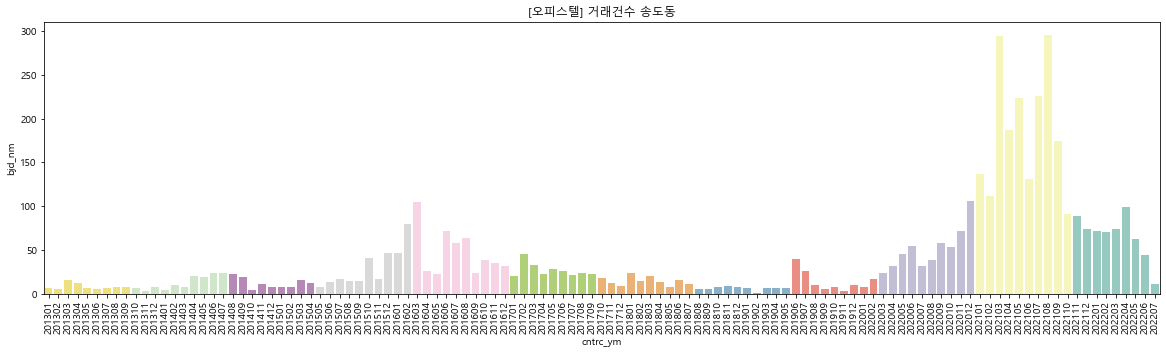

In [42]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=30)
sns.barplot(x='cntrc_ym', y='bjd_nm', data = df18[df18['bjd_nm_d']=='송도동'].groupby(['cntrc_ym']).agg({'bjd_nm':'count'}).reset_index(), palette='Set3_r')
plt.xticks(rotation=90)
plt.title("[오피스텔] 거래건수 송도동")
plt.show()

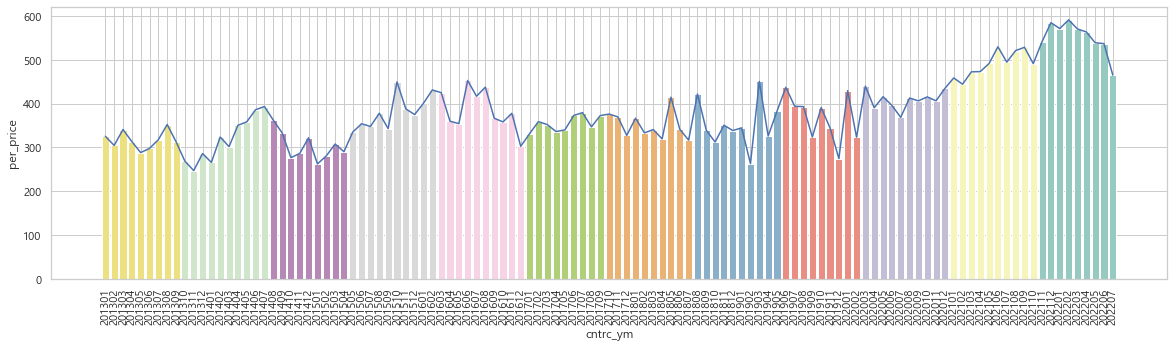

In [127]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='cntrc_ym', y='per_price', data = df18.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
df18.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index()['per_price'].plot()
plt.xticks(rotation=90)
plt.show()

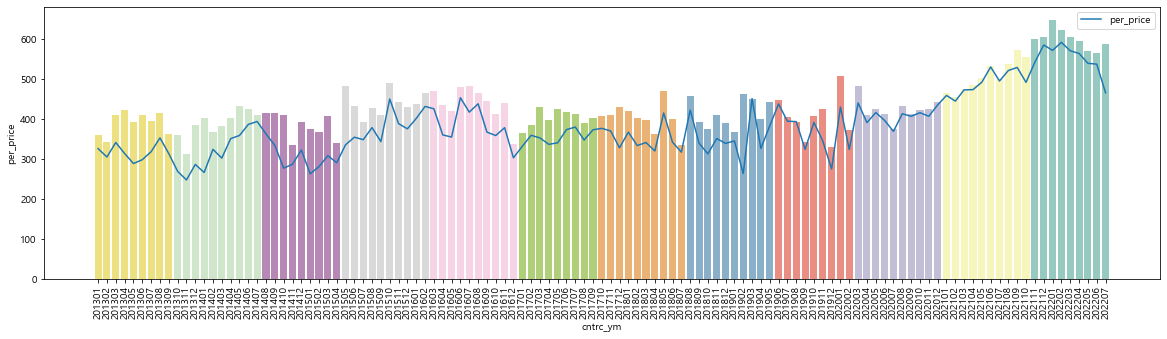

In [11]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='cntrc_ym', y='per_price', data = df18[df18['bjd_nm_d']=='송도동'].groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
df18.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index()['per_price'].plot(legend='전체')
plt.xticks(rotation=90)
plt.show()

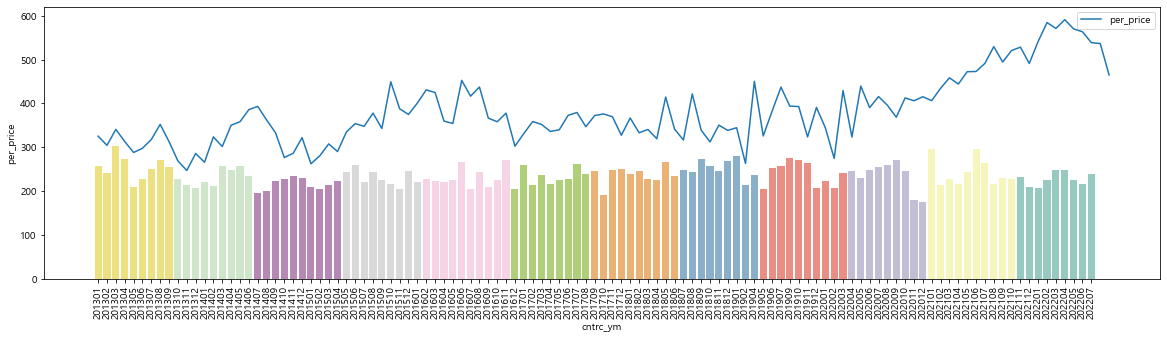

In [12]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='cntrc_ym', y='per_price', data = df18[df18['bjd_nm_d']!='송도동'].groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
df18.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index()['per_price'].plot(legend='전체')
plt.xticks(rotation=90)
plt.show()

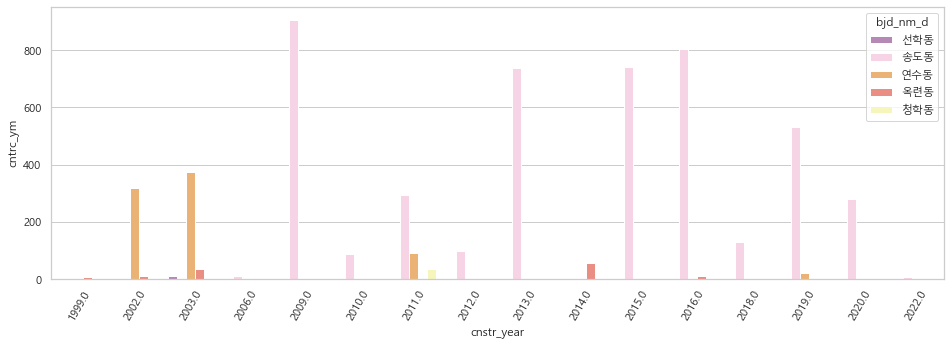

In [130]:
tmp=df18.groupby(['bjd_nm_d','cnstr_year']).agg({'cntrc_ym':'count'}).reset_index()
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(16,5))
plt.xticks(rotation=60)
sns.barplot(x='cnstr_year', y='cntrc_ym', hue='bjd_nm_d', data = tmp, palette='Set3_r')
plt.show()

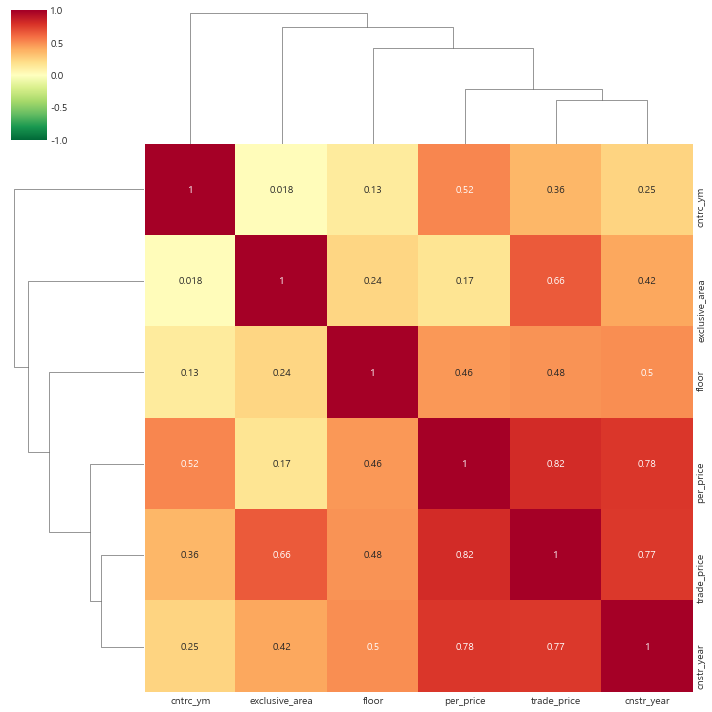

In [180]:
df = df15.iloc[:,[4,5,7,8,9,11]].corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlGn_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

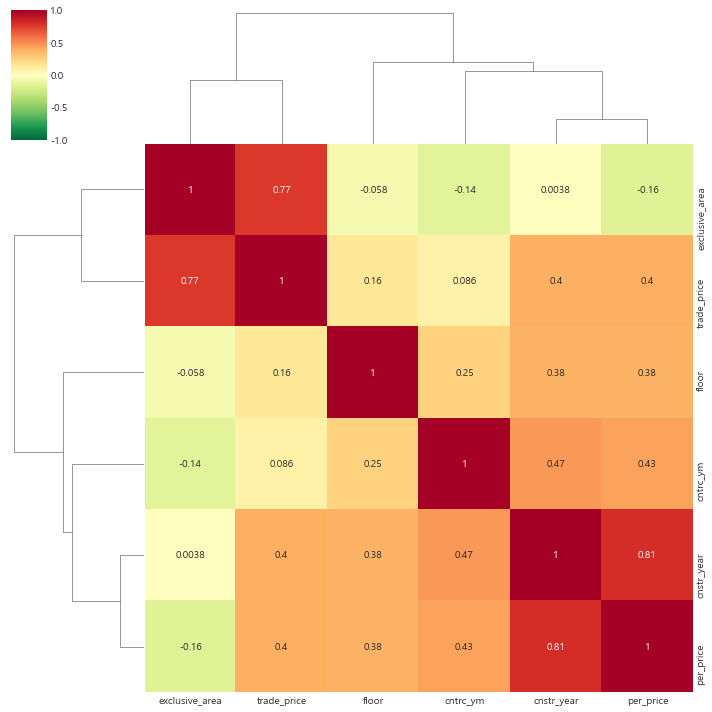

In [181]:
df = df18.iloc[:,[4,5,7,8,9,11]].corr()
sns.clustermap(df, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlGn_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

# 19_연수구_아파트_전월세_실거래가

In [38]:
df19=pd.read_excel('19_연수구_아파트_전월세_실거래가.xlsx')
df19['bjd_nm_d']=df19['bjd_nm'].str.split(" ").str[2]

In [39]:
df19전세=df19[df19['rent_type']=='전세']
df19전세['per_price']=df19전세['deposit']/df19전세['exclusive_area']
df19전세.head(1)

,bjd_nm,road_nm,bunji,cmplx_nm,rent_type,exclusive_area,cntrc_ym,cntrc_day,deposit,m_rent,floor,cnstr_year,bjd_nm_d,per_price
0,인천광역시 연수구 동춘동,먼우금로83번길 12,938,건영,전세,84.945,201301,19,15500,0,4,1994.0,동춘동,182.471011


In [53]:
df19월세=df19[df19['rent_type']=='월세']
df19월세.head(1)

,bjd_nm,road_nm,bunji,cmplx_nm,rent_type,exclusive_area,cntrc_ym,cntrc_day,deposit,m_rent,floor,cnstr_year,bjd_nm_d
1,인천광역시 연수구 동춘동,먼우금로83번길 12,938,건영,월세,73.66,201301,23,1500,65,2,1994.0,동춘동


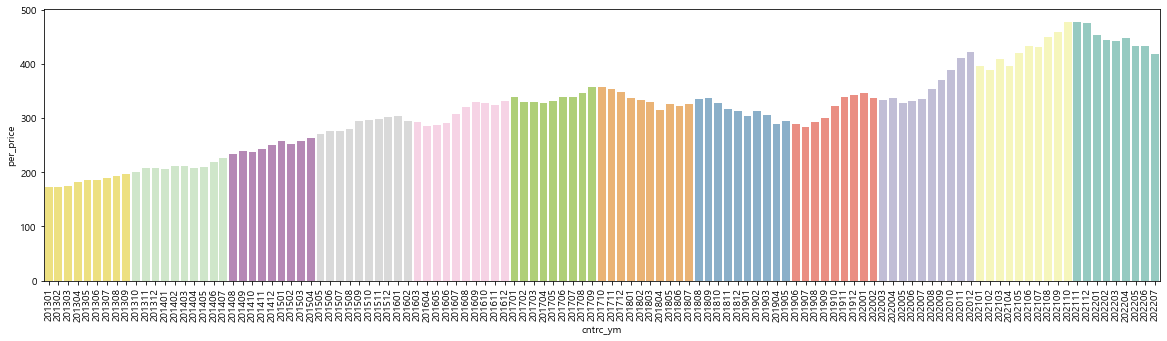

In [150]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='cntrc_ym', y='per_price', data = df19전세.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
plt.xticks(rotation=90)
plt.show()

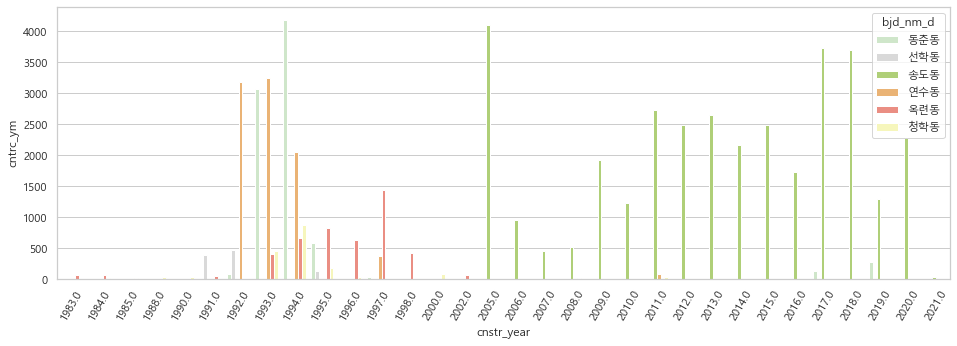

In [118]:
tmp=df19전세.groupby(['bjd_nm_d','cnstr_year']).agg({'cntrc_ym':'count'}).reset_index()
sns.set_theme(style="whitegrid")
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(16,5))
plt.xticks(rotation=60)
sns.barplot(x='cnstr_year', y='cntrc_ym', hue='bjd_nm_d', data = tmp, palette='Set3_r')
plt.show()

# 22_연수구_오피스텔_전월세_실거래가

In [117]:
df22=pd.read_excel('22_연수구_오피스텔_전월세_실거래가.xlsx')
df22['bjd_nm_d']=df22['bjd_nm'].str.split(" ").str[2]
df22전세=df22[df22['rent_type']=='전세']
df22전세['per_price']=df22전세['deposit']/df22전세['exclusive_area']
df22월세=df22[df22['rent_type']=='월세']
df22월세['deposit_trans']=(df22월세['deposit']+df22월세['m_rent']*12/4)
df22월세['per_price']=df22월세['deposit_trans']/df22['exclusive_area']

In [60]:
df22전세.head(1)

,bjd_nm,road_nm,bunji,cmplx_nm,rent_type,exclusive_area,cntrc_ym,cntrc_day,deposit,m_rent,floor,cnstr_year,bjd_nm_d,per_price
0,인천광역시 연수구 송도동,해돋이로 107,4-1,송도 더샵 퍼스트월드,전세,46.57,201301,4,7200,0,22,2009.0,송도동,154.60597


In [59]:
df22월세.head(1)

,bjd_nm,road_nm,bunji,cmplx_nm,rent_type,exclusive_area,cntrc_ym,cntrc_day,deposit,m_rent,floor,cnstr_year,bjd_nm_d,deposit_trans,per_price
6,인천광역시 연수구 송도동,컨벤시아대로 50,20-22,송도 푸르지오 월드마크(20-22),월세,49.04,201301,2,1000,70,3,2010.0,송도동,1210.0,24.673736


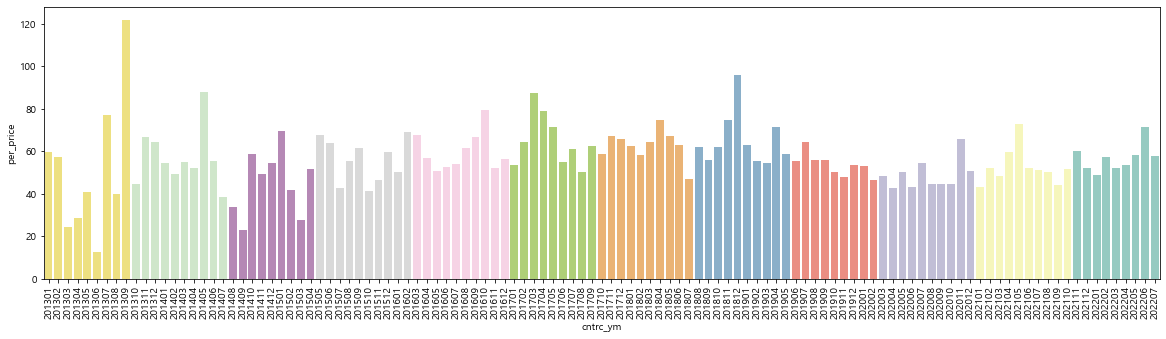

In [61]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='cntrc_ym', y='per_price', data = df22월세.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
plt.xticks(rotation=90)
plt.show()

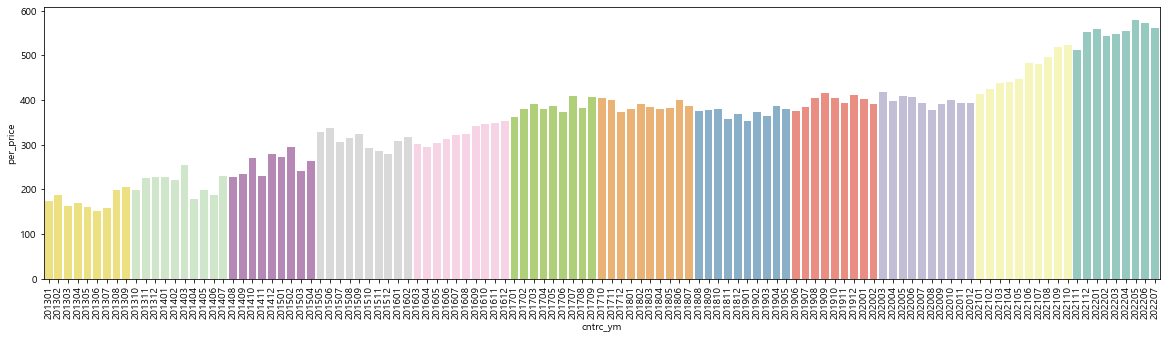

In [62]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.barplot(x='cntrc_ym', y='per_price', data = df22전세.groupby(['cntrc_ym']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
plt.xticks(rotation=90)
plt.show()

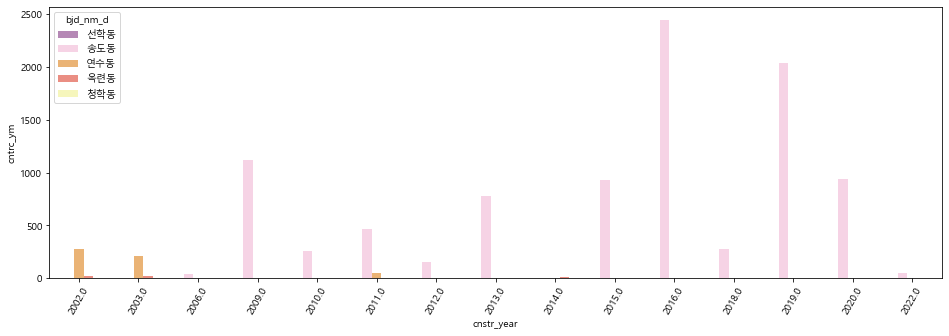

In [116]:
tmp=df22전세.groupby(['bjd_nm_d','cnstr_year']).agg({'cntrc_ym':'count'}).reset_index()
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(16,5))
plt.xticks(rotation=60)
sns.barplot(x='cnstr_year', y='cntrc_ym', hue='bjd_nm_d', data = tmp, palette='Set3_r')
plt.title('')
plt.show()

# 25_연수구_분양입주권_실거래가

In [4]:
df25=pd.read_excel('25_연수구_분양입주권_실거래가.xlsx')

In [167]:
df25['per_price'] = df25['trade_price']/df25['exclusive_area']

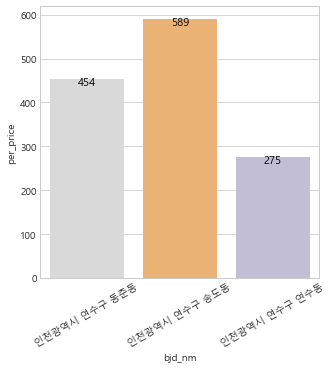

In [173]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(5,5))
plt.xticks(rotation=30)
ax=sns.barplot(x='bjd_nm', y='per_price',  data = df25.groupby(['bjd_nm']).agg({'per_price':'mean'}).reset_index(), palette='Set3_r')
for p in ax.patches:
    ax.annotate("%.0f"%p.get_height(),(p.get_x() + p.get_width()/2, p.get_height()-30),
               ha='center', va='center', fontsize=11, color='black', xytext=(0,10),
               textcoords='offset points')
plt.title('')
plt.show()

# 26_연수구_개별공시지가

In [41]:
df26=pd.read_excel('26_연수구_개별공시지가.xlsx')
df26['bjd_nm_d']=df26['bjd_nm'].str.split(" ").str[2]
emdlist=df26['bjd_nm_d'].unique()

In [ ]:
df26

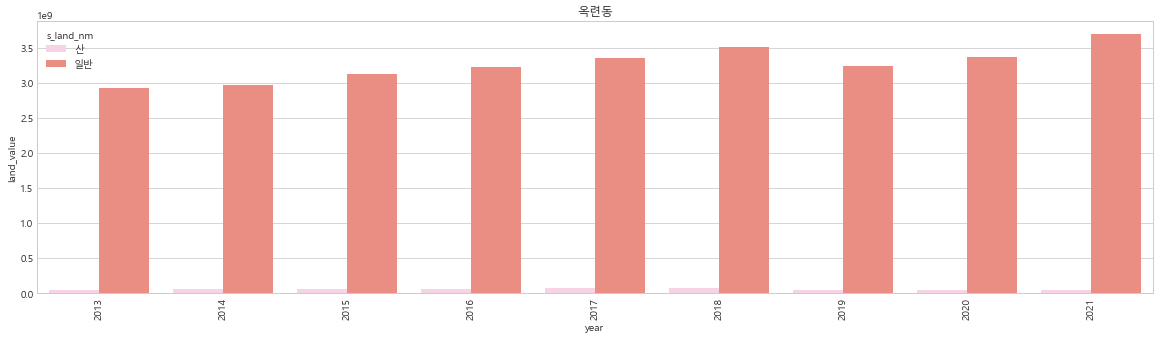

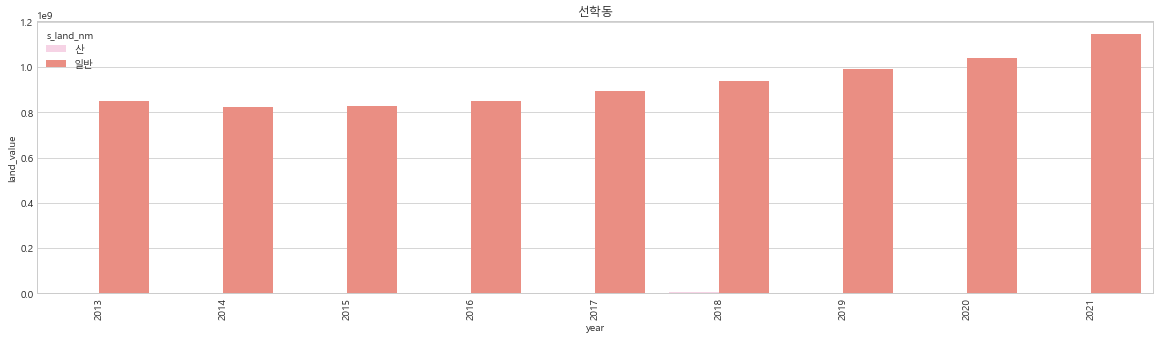

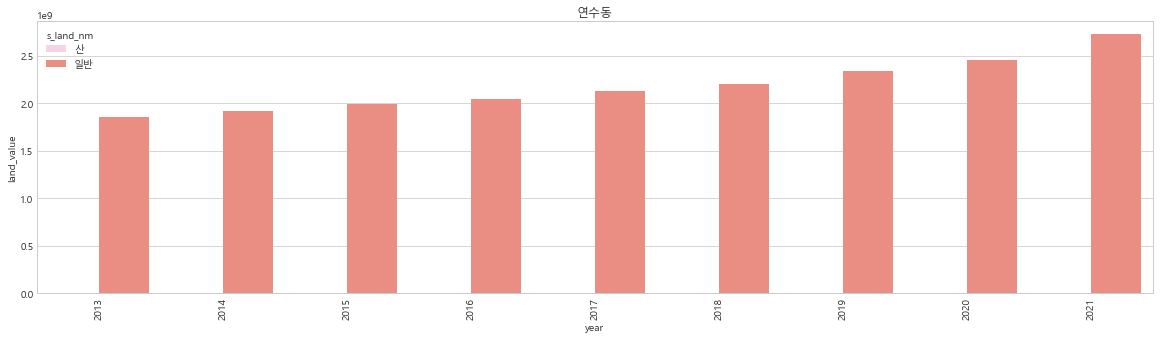

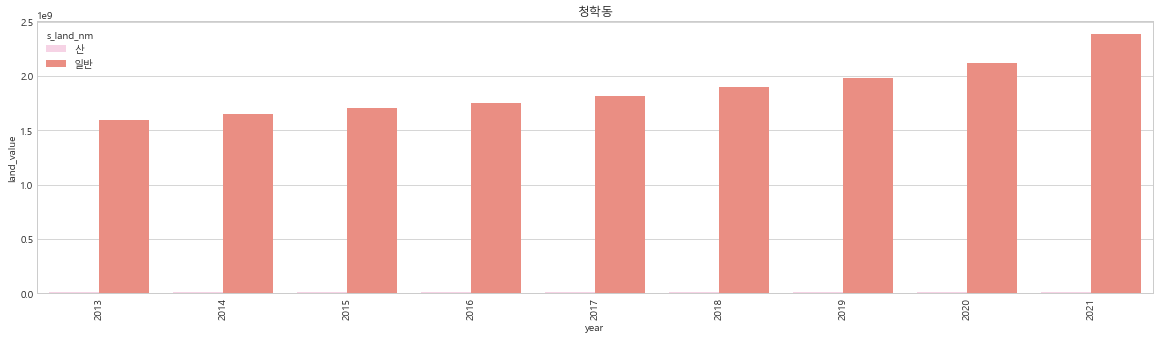

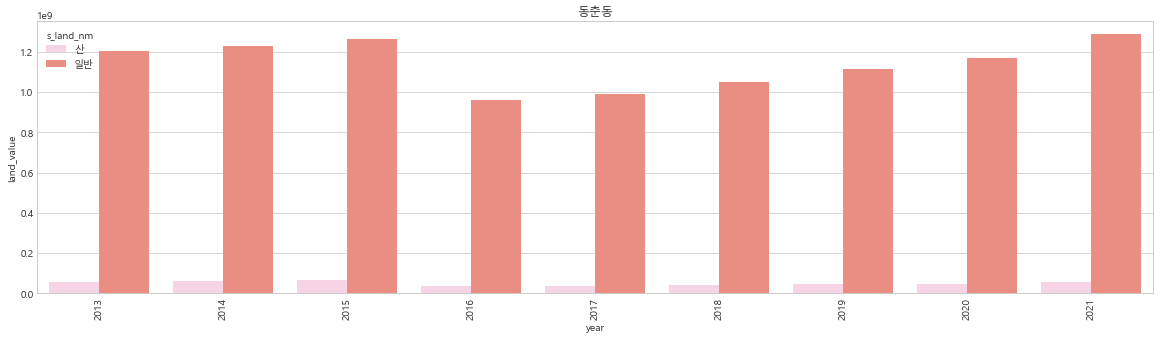

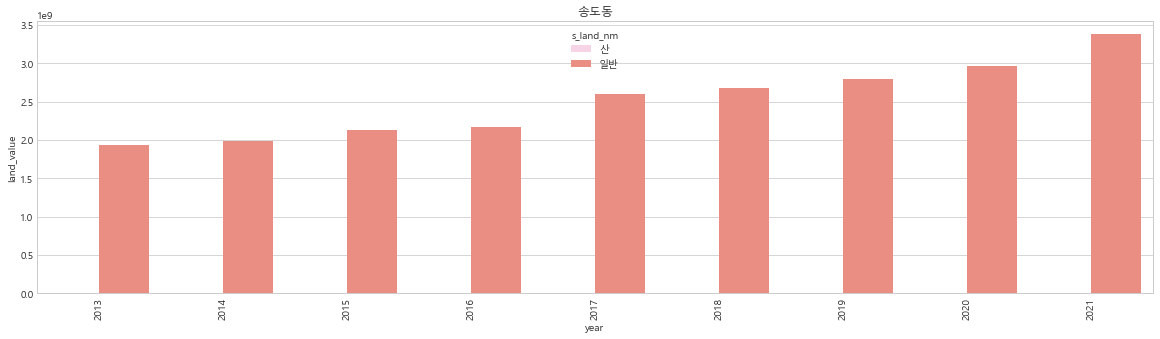

In [194]:
for i in range(0,len(emdlist)):
    plt.rc('font', family='Malgun Gothic')
    plt.rc("axes",unicode_minus=False)
    plt.figure(figsize=(20,5))
    plt.xticks(rotation=90)
    sns.barplot(x='year', y='land_value', hue='s_land_nm', data = df26[df26['bjd_nm_d']==emdlist[i]].groupby(['year','s_land_nm']).agg({'land_value':'sum'}).sort_values(by=['s_land_nm']).reset_index(), palette='Set3_r')
    plt.xticks(rotation=90)
    plt.title(emdlist[i])
    plt.show()

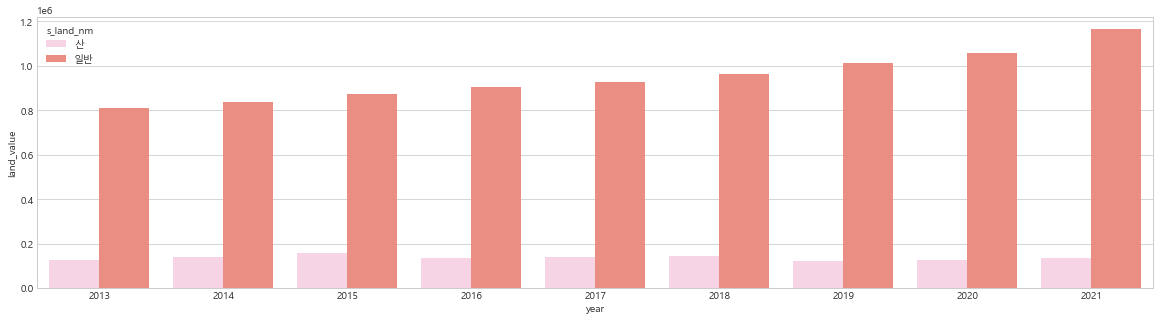

In [195]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,5))
#plt.xticks(rotation=0)
sns.barplot(x='year', y='land_value', hue='s_land_nm', data = df26.groupby(['year','s_land_nm']).agg({'land_value':'mean'}).sort_values(by=['s_land_nm']).reset_index(), palette='Set3_r')
plt.show()

# 행정동별 요약 - dendrogram

Text(0, 0.5, '')

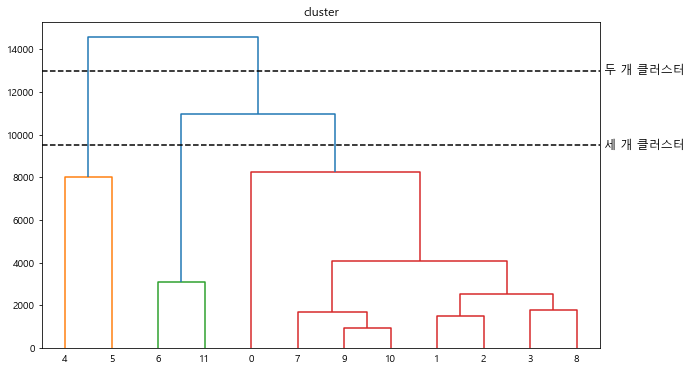

In [72]:
label = save['label']
cluster = linkage(save.iloc[:,1:],method='complete')
plt.figure(figsize=(10,6))
plt.title("cluster")
dendrogram(cluster, leaf_rotation=0, leaf_font_size =10)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [13000, 13000], '--', c='k')
ax.plot(bounds, [9500, 9500], '--', c='k')
ax.text(bounds[1], 13000, ' 두 개 클러스터', va='center', fontdict={'size': 12})
ax.text(bounds[1], 9500, ' 세 개 클러스터', va='center', fontdict={'size': 12})
plt.xlabel("")
plt.ylabel("")